## Data quality check / cleaning / preparation

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [ ]:
import pandas as pd
import numpy as np
import random as rm
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

### Distribution of variables
*By Patrick Schmid*

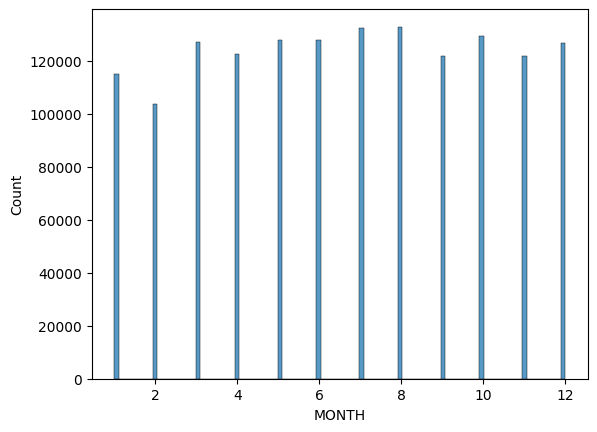

In [27]:
## Distributions - Month

sns.histplot(data=df_subset,x='MONTH')

<Axes: xlabel='DAY_OF_WEEK', ylabel='Count'>

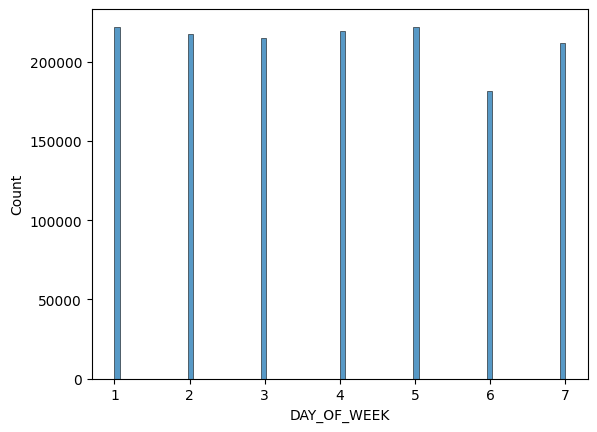

In [28]:
## Distributions - DAY_OF_WEEK

sns.histplot(data=df_subset,x='DAY_OF_WEEK')

<Axes: xlabel='DEP_DEL15', ylabel='Count'>

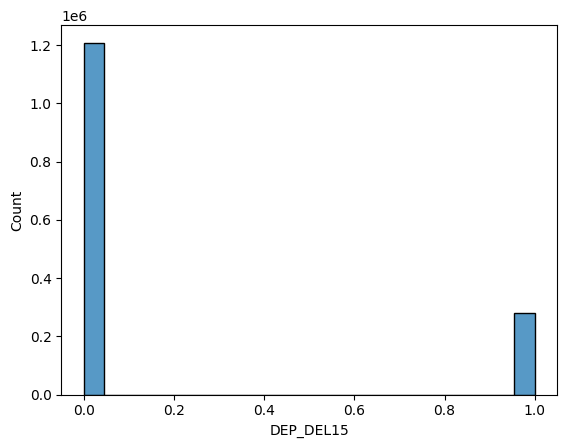

In [29]:
## Distributions - DEP_DEL15

sns.histplot(data=df_subset,x='DEP_DEL15')

<Axes: xlabel='DEP_TIME_BLK', ylabel='Count'>

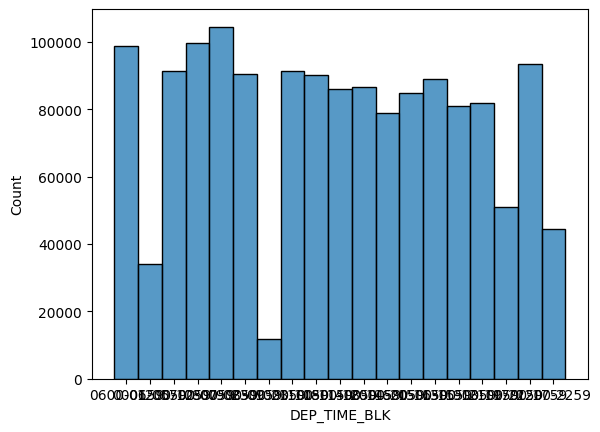

In [30]:
## Distributions - DEP_TIME_BLK

sns.histplot(data=df_subset,x='DEP_TIME_BLK')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

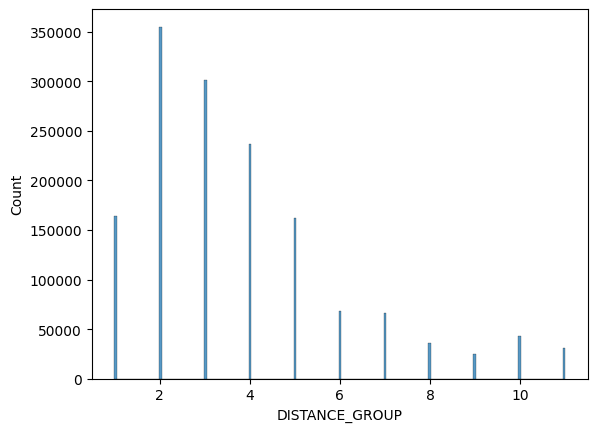

In [31]:
## Distributions - DISTANCE_GROUP

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

<Axes: xlabel='SEGMENT_NUMBER', ylabel='Count'>

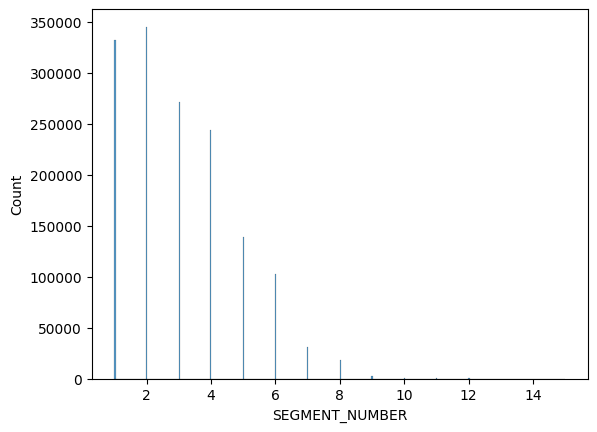

In [32]:
## Distributions - SEGMENT_NUMBER

sns.histplot(data=df_subset,x='SEGMENT_NUMBER')

<Axes: xlabel='CONCURRENT_FLIGHTS', ylabel='Count'>

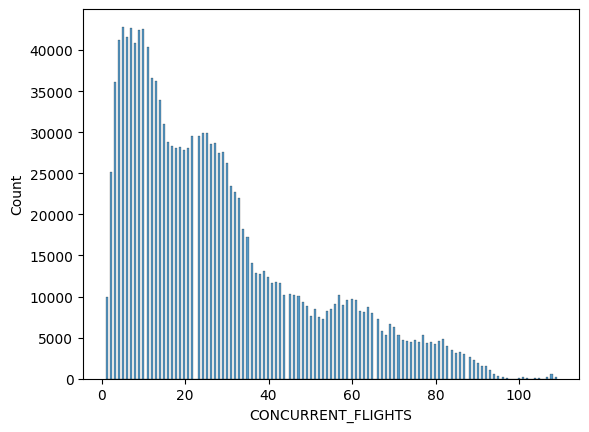

In [34]:
## Distributions - CONCURRENT_FLIGHTS

sns.histplot(data=df_subset,x='CONCURRENT_FLIGHTS')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

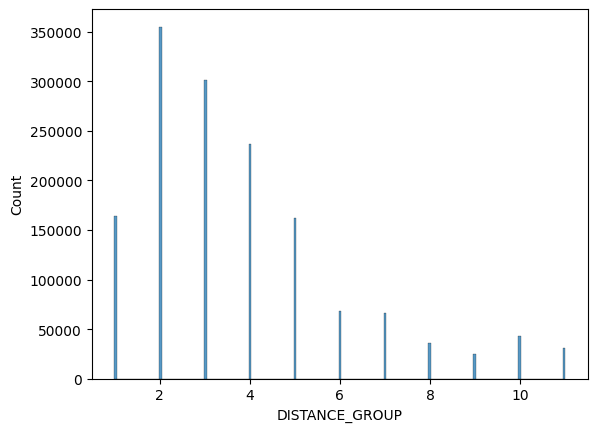

In [33]:
## Distributions - DISTANCE_GROUP

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

<Axes: xlabel='NUMBER_OF_SEATS', ylabel='Count'>

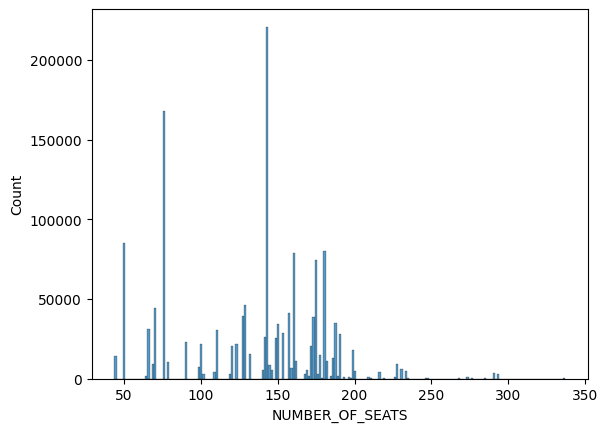

In [35]:
## Distributions - NUMBER_OF_SEATS

sns.histplot(data=df_subset,x='NUMBER_OF_SEATS')

<Axes: xlabel='CARRIER_NAME', ylabel='Count'>

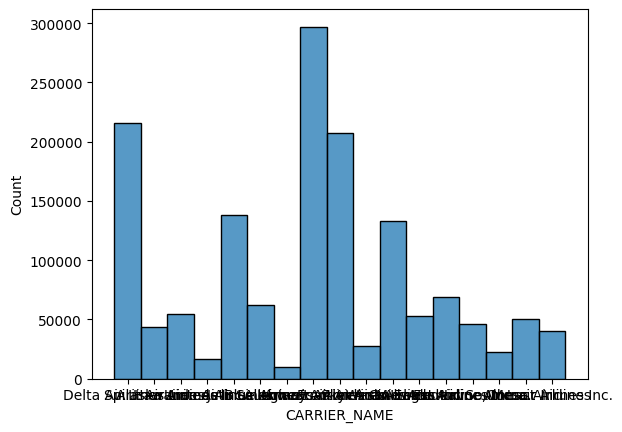

In [36]:
## Distributions - CARRIER_NAME

sns.histplot(data=df_subset,x='CARRIER_NAME')

<Axes: xlabel='AIRPORT_FLIGHTS_MONTH', ylabel='Count'>

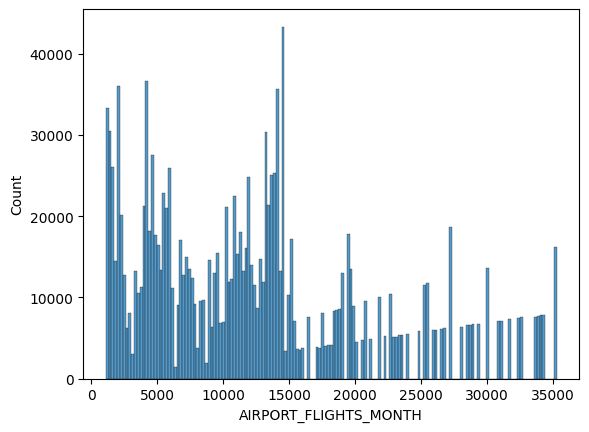

In [37]:
## Distributions - AIRPORT_FLIGHTS_MONTH

sns.histplot(data=df_subset,x='AIRPORT_FLIGHTS_MONTH')

<Axes: xlabel='AIRLINE_FLIGHTS_MONTH', ylabel='Count'>

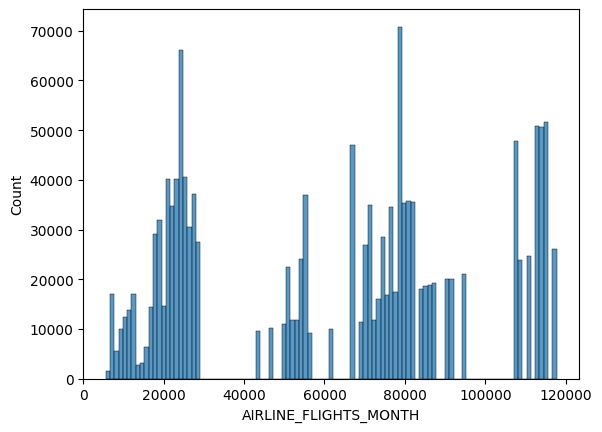

In [38]:
## Distributions - AIRLINE_FLIGHTS_MONTH

sns.histplot(data=df_subset,x='AIRLINE_FLIGHTS_MONTH')

<Axes: xlabel='AIRLINE_AIRPORT_FLIGHTS_MONTH', ylabel='Count'>

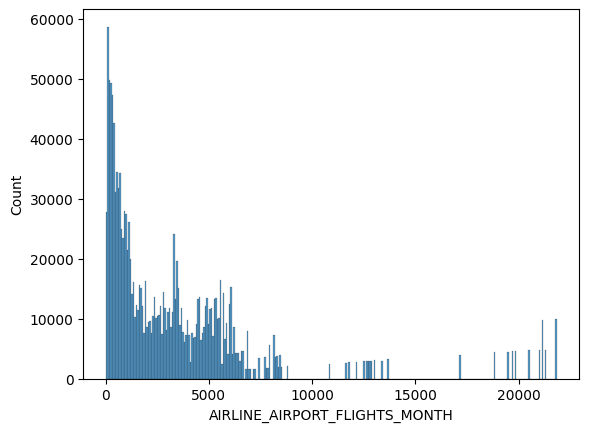

In [39]:
## Distributions - AIRLINE_AIRPORT_FLIGHTS_MONTH

sns.histplot(data=df_subset,x='AIRLINE_AIRPORT_FLIGHTS_MONTH')

<Axes: xlabel='AVG_MONTHLY_PASS_AIRPORT', ylabel='Count'>

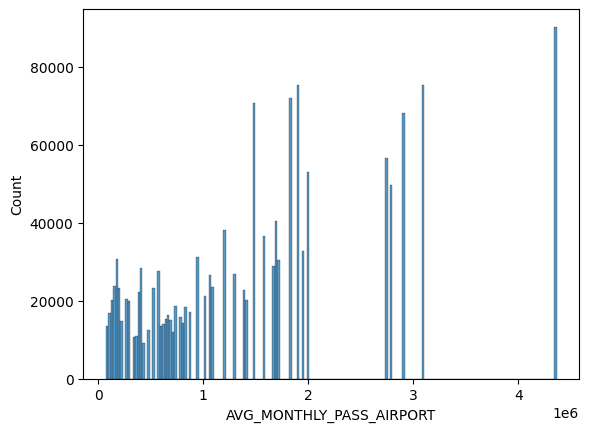

In [40]:
## Distributions - AVG_MONTHLY_PASS_AIRPORT

sns.histplot(data=df_subset,x='AVG_MONTHLY_PASS_AIRPORT')

<Axes: xlabel='AVG_MONTHLY_PASS_AIRLINE', ylabel='Count'>

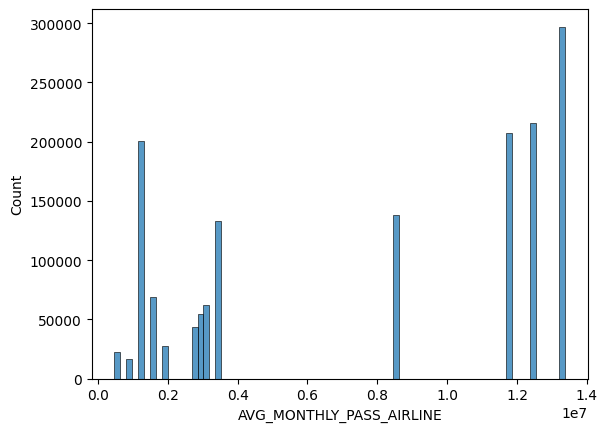

In [41]:
## Distributions - AVG_MONTHLY_PASS_AIRLINE

sns.histplot(data=df_subset,x='AVG_MONTHLY_PASS_AIRLINE')

<Axes: xlabel='FLT_ATTENDANTS_PER_PASS', ylabel='Count'>

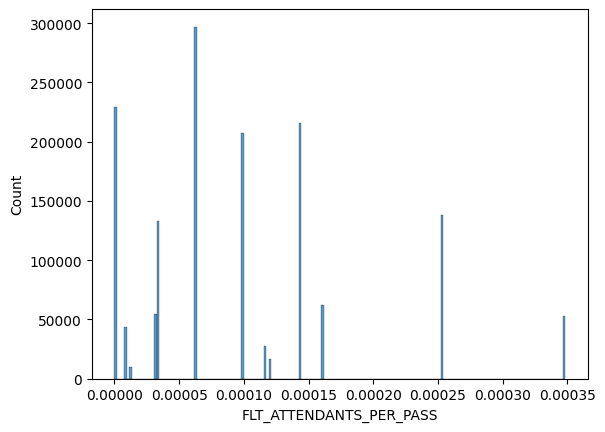

In [44]:
## Distributions - DISTAFLT_ATTENDANTS_PER_PASS

sns.histplot(data=df_subset,x='FLT_ATTENDANTS_PER_PASS')

<Axes: xlabel='GROUND_SERV_PER_PASS', ylabel='Count'>

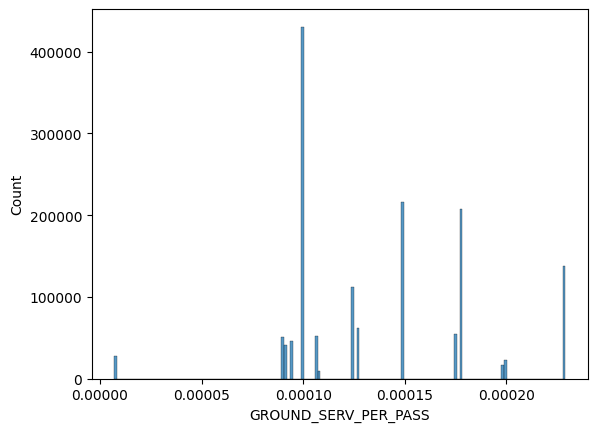

In [43]:
## Distributions - GROUND_SERV_PER_PASS

sns.histplot(data=df_subset,x='GROUND_SERV_PER_PASS')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

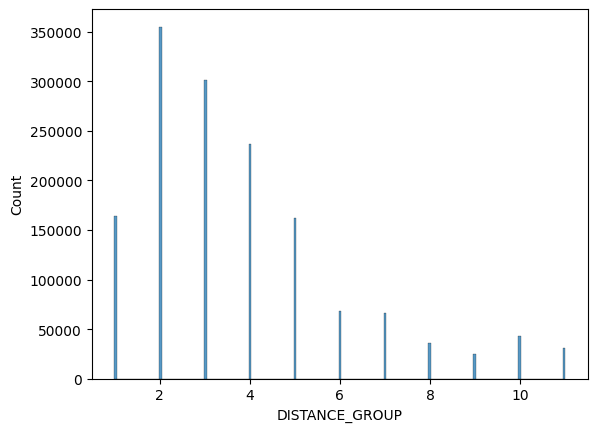

In [45]:
## Distributions - PLANE_AGE

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

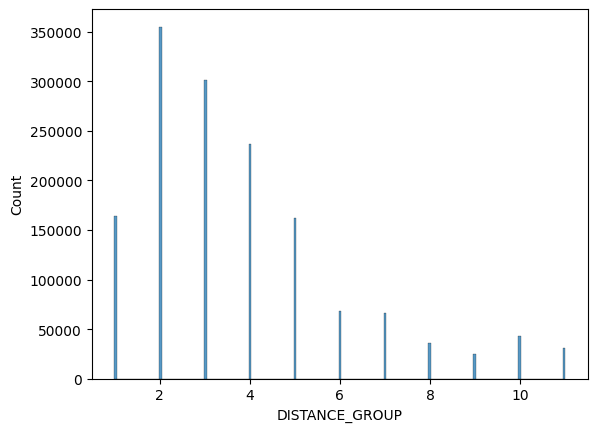

In [46]:
## Distributions - DISTANCE_GROUP

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

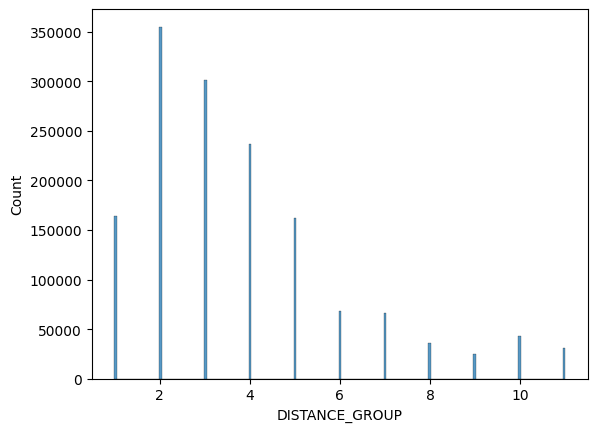

In [47]:
## Distributions - DISTANCE_GROUP

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

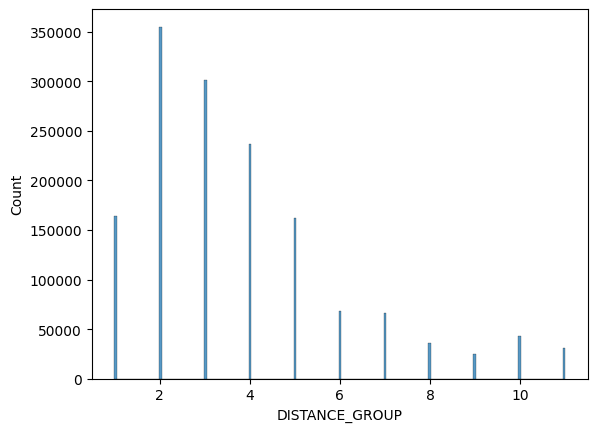

In [48]:
## Distributions - DISTANCE_GROUP

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

<Axes: xlabel='DISTANCE_GROUP', ylabel='Count'>

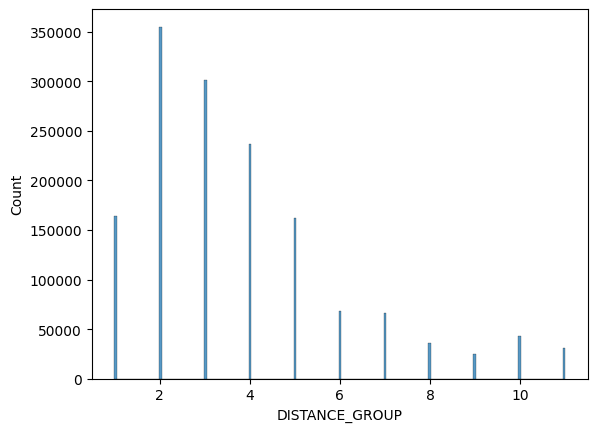

In [49]:
## Distributions - DISTANCE_GROUP

sns.histplot(data=df_subset,x='DISTANCE_GROUP')

### Data cleaning


In [ ]:
# Importing the dataset

data=pd.read_csv("full_data_flightdelay.csv")

# Checking for null values

data.isnull().sum()

# No missing values

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

### Data preparation
*By Patrick Schmid*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since our original dataset is over six million rows, it wasn't machine workable for many of our laptops. So we had to remove significant chunks of the data to cut down on runtime. We accomplished this by randomly removing rows using np.random.choice. This allowed us to remove large swaths of the data, while still preserving all trends and relationships present in the data

2. Since each of our EDA questions focused on a different aspect of the data, any column creation or variable aggregation was done individually to each EDA question's needs, and as such will feature in the EDA code section of this report

In [ ]:
# Removing 5 million rows randomly, to make the dataset machine workable
# Still preserves all trends / relations

np.random.seed(10)

remove_n = 5000000
drop_indices = np.random.choice(data.index, remove_n, replace=False)
df_subset = data.drop(drop_indices)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Analysis 1
*By Andre Salgado*

In [ ]:
flights_data = df_subset

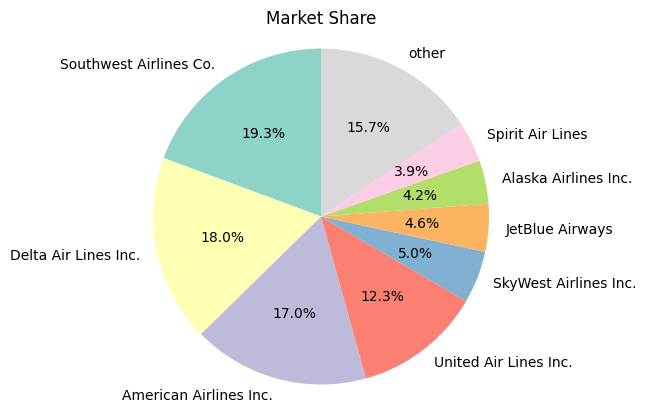

In [ ]:
# Market Share Pie Chart
airline_market=flights_data.groupby('CARRIER_NAME')
airline_market_flights = airline_market['AVG_MONTHLY_PASS_AIRLINE'].mean().reset_index()
airline_market_flights = airline_market_flights.sort_values(by='AVG_MONTHLY_PASS_AIRLINE',ascending=False).reset_index(drop=True)
threshold = 8
# locate carriers below the threshold
small_carriers = airline_market_flights.iloc[threshold:]

# Sum the values for carriers below the threshold and create a new row for 'other'
other_row = pd.DataFrame({
    'CARRIER_NAME': ['other'],
    'AVG_MONTHLY_PASS_AIRLINE': [small_carriers['AVG_MONTHLY_PASS_AIRLINE'].sum()]
})

airline_market_flights = pd.concat([airline_market_flights.iloc[:threshold], other_row], ignore_index=True)

custom_colors = sns.color_palette("Set3", len(airline_market_flights))


plt.pie(airline_market_flights['AVG_MONTHLY_PASS_AIRLINE'], labels=airline_market_flights['CARRIER_NAME'], autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Market Share')
plt.show()

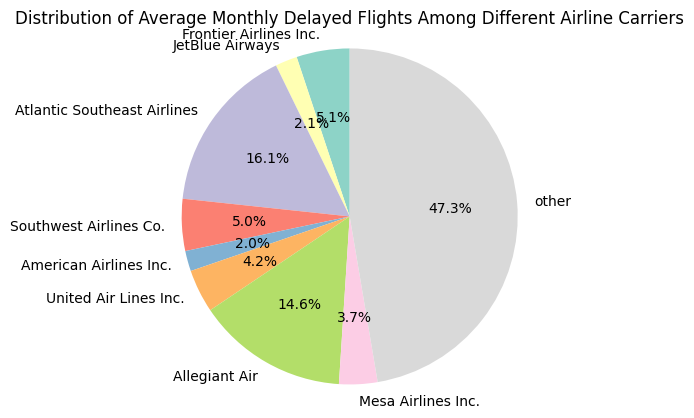

In [ ]:
# Distribution of average monthly delayed flights
airline_market = flights_data.groupby('CARRIER_NAME')

airline_market_flights = airline_market['DEP_DEL15'].mean().reset_index()

# Sort in descending order
airline_market_flights = airline_market_flights.sort_values(by='DEP_DEL15', ascending=False).reset_index(drop=True)

# average monthly flights for each airline
airline_market_flights['AVG_MONTHLY_FLIGHTS'] = airline_market['AIRLINE_FLIGHTS_MONTH'].mean().reset_index()['AIRLINE_FLIGHTS_MONTH']

# average monthly delayed flights for each airline
airline_market_flights['AVG_MONTHLY_DELAYED_FLIGHTS'] = airline_market_flights['DEP_DEL15'] * airline_market_flights['AVG_MONTHLY_FLIGHTS']

threshold = 8

small_carriers = airline_market_flights.iloc[threshold:]

other_row = pd.DataFrame({
    'CARRIER_NAME': ['other'],
    'AVG_MONTHLY_DELAYED_FLIGHTS': [small_carriers['AVG_MONTHLY_DELAYED_FLIGHTS'].sum()]
})

airline_market_flights = pd.concat([airline_market_flights.iloc[:threshold], other_row], ignore_index=True)

custom_colors = sns.color_palette("Set3", len(airline_market_flights))

plt.pie(airline_market_flights['AVG_MONTHLY_DELAYED_FLIGHTS'], labels=airline_market_flights['CARRIER_NAME'], autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of Average Monthly Delayed Flights Among Different Airline Carriers')
plt.show()

In [ ]:
# dataframe of airports
unique_airports = flights_data[['LONGITUDE','LATITUDE', "DEPARTING_AIRPORT"]].drop_duplicates()
unique_airports = unique_airports.reset_index(drop=True)
unique_airports

,LONGITUDE,LATITUDE,DEPARTING_AIRPORT
0,-115.152,36.080,McCarran International
1,-81.325,28.432,Orlando International
2,-116.225,43.565,Boise Air Terminal
3,-78.782,35.875,Raleigh-Durham International
4,-94.714,39.298,Kansas City International
...,...,...,...
91,-84.220,39.901,James M Cox/Dayton International
92,-78.930,33.679,Myrtle Beach International
93,-87.188,30.473,Pensacola Regional
94,-70.304,43.644,Portland International Jetport


In [ ]:
# create a geo dataframe from the previous df
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(unique_airports['LONGITUDE'], unique_airports['LATITUDE'])]
geo_df = gpd.GeoDataFrame(unique_airports,
                          crs = crs,
                          geometry = geometry)
geo_df.head()

In [ ]:
# geo data frame of full dataset
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(flights_data['LONGITUDE'], flights_data['LATITUDE'])]
geo_flights_df = gpd.GeoDataFrame(flights_data,
                          crs = crs,
                          geometry = geometry)
geo_flights_df.head()

In [ ]:
# histogram of probability of delay by airport
prob_of_delay = geo_flights_df.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].mean()
sns.displot(data=prob_of_delay, color="#B6ACD1")
plt.title("Probability of Delay by Airport Distribution")
plt.xlabel('Probability of Delay')
plt.show()

In [ ]:
# Average monthly flights by airport histogram
average_flights = geo_flights_df.groupby('DEPARTING_AIRPORT')['AIRPORT_FLIGHTS_MONTH'].mean()
sns.displot(data=average_flights, color="#836EAA")
plt.title("Average Monthly Flights by Airport Distribution")
plt.xlabel('Average Monthly Flights')
plt.show()

In [ ]:
# Average Monthly delayed flights by airport histogram
average_flights = geo_flights_df.groupby('DEPARTING_AIRPORT')['AIRPORT_FLIGHTS_MONTH'].mean()
average_delay_flights=average_flights*prob_of_delay
sns.displot(data=average_delay_flights, color="#836EAA")
plt.title("Average Monthly Delayed Flights by Airport Distribution")
plt.xlabel('Average Monthly Flights')
plt.show()

In [ ]:
# heat map of prob of delay
fig, ax = plt.subplots(figsize=(10, 10))
US_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

# Plot the mean delay by airport
mean_delay_by_airport = geo_flights_df.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].mean().reset_index()
geo_df = geo_df.merge(mean_delay_by_airport[['DEPARTING_AIRPORT', 'DEP_DEL15']], on='DEPARTING_AIRPORT', how='inner')
geo_df.plot(column='DEP_DEL15', ax=ax, cmap='rainbow',
            legend=True, legend_kwds={'shrink': 0.3},
            markersize=10)

ax.set_title('US Airports by probability of long Delay')
plt.xlim(-170, -60)
plt.ylim(15, 75)
plt.show()

In [ ]:
# finding closest airport
closest_airports = []
minimum_distances = []

for j in range(len(geo_df)):
    min_dist = float("inf")
    closest_airport_name = None

    for i in range(len(geo_df)):
        if j != i:

            distance = np.sqrt((geo_df['LONGITUDE'][j] - geo_df['LONGITUDE'][i])**2 + (geo_df['LATITUDE'][j] - geo_df['LATITUDE'][i])**2)

            if distance < min_dist:
                min_dist = distance
                closest_airport_name = geo_df['DEPARTING_AIRPORT'][i]

    minimum_distances.append(min_dist)
    closest_airports.append(closest_airport_name)

geo_df['closest_airport'] = closest_airports
geo_df['closest_airport_distance']= minimum_distances

In [ ]:
# creating regions of airports
# maximum distance for airports to be considered in the same region
max_region_distance = 15

# new column for the region
geo_df['region'] = np.nan

for i in range(len(geo_df)):
    if np.isnan(geo_df['region'][i]):
        current_region = len(geo_df['region'].unique()) + 1
        geo_df.at[i, 'region'] = current_region
        for j in range(len(geo_df)):
            if i != j and np.isnan(geo_df['region'][j]):

                distance = np.sqrt((geo_df['LONGITUDE'][i] - geo_df['LONGITUDE'][j])**2 + (geo_df['LATITUDE'][i] - geo_df['LATITUDE'][j])**2)

                if distance < max_region_distance:
                    geo_df.at[j, 'region'] = current_region

In [ ]:
# finding average monthly flights
mean_flights_by_airport = geo_flights_df.groupby('DEPARTING_AIRPORT')['AIRPORT_FLIGHTS_MONTH'].mean().reset_index()
mean_flights_by_airport

# Plot the mean delay by airport
geo_df = geo_df.merge(mean_flights_by_airport[['DEPARTING_AIRPORT', 'AIRPORT_FLIGHTS_MONTH']], on='DEPARTING_AIRPORT', how='inner')

In [ ]:
# map of all airports that are within 1 eucladian distance away
closest = geo_df.sort_values(by='closest_airport_distance')
closest_neighbor_whole = closest.loc[closest['closest_airport_distance']<1]

fig, ax = plt.subplots(figsize=(10, 10))
US_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')


closest_neighbor_whole.plot(column='DEP_DEL15', ax=ax, cmap='rainbow', legend=True, legend_kwds={'shrink': 0.3}, markersize=geo_df['AIRPORT_FLIGHTS_MONTH']/100, alpha=.5)


ax.set_title('US Airports Closest Neighbor Approach')
plt.xlim(-130, -65)
plt.ylim(25, 50)
plt.show()

In [ ]:
# NY example of close airports
fig, ax = plt.subplots(figsize=(10, 10))
US_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')


closest_neighbor_whole.plot(column='DEP_DEL15', ax=ax, cmap='Accent', legend=True, legend_kwds={'shrink': 0.3}, markersize=geo_df['AIRPORT_FLIGHTS_MONTH']/100, alpha=.5)


ax.set_title('New York City Airports Closest Neighbor Approach')
plt.xlim(-74.5, -73)
plt.ylim(40.4, 41.25)
plt.show()

In [ ]:
# average prob of delay and monthly flights by region
regions_mean_flights = geo_df.groupby(by='region')['AIRPORT_FLIGHTS_MONTH'].mean()
regions_mean_prob_delay = geo_df.groupby(by='region')['DEP_DEL15'].mean()
regions_data = pd.DataFrame({
    'region': regions_mean_prob_delay.index,
    'mean_prob_delay': regions_mean_prob_delay.values,
    'mean_flights_month': regions_mean_flights.values
})

print(regions_data)

In [ ]:
# map of airports by region
desired_region = 3 # Change this to the desired region number

region_df = geo_df.loc[geo_df['region'] == desired_region]


# Plotting the map
fig, ax = plt.subplots(figsize=(10, 10))
US_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
region_df.plot(column='DEP_DEL15', ax=ax, cmap='rainbow', legend=True, legend_kwds={'shrink': 0.3}, markersize=region_df['AIRPORT_FLIGHTS_MONTH']/100, alpha=0.5)
ax.set_title(f'Region {desired_region-1}: US Airports by Probability of Long Delay and Average Monthly Flights')
plt.xlim(-170, -60)
plt.ylim(15, 75)
plt.show()

In [ ]:
# United Airlines specific data
mean_prob_carr = flights_data.groupby(by=['CARRIER_NAME','DEPARTING_AIRPORT'])['DEP_DEL15'].mean()
mean_flights_carr = flights_data.groupby(by=['CARRIER_NAME','DEPARTING_AIRPORT'])['AIRPORT_FLIGHTS_MONTH'].mean()
mean_prob_united= pd.DataFrame(mean_prob_carr['United Air Lines Inc.'])
mean_flights_united=pd.DataFrame(mean_flights_carr['United Air Lines Inc.'])
united_data = mean_prob_united.merge(mean_flights_united[['AIRPORT_FLIGHTS_MONTH']], on='DEPARTING_AIRPORT', how='inner')
united_data=united_data.reset_index()

united_data = united_data.merge(geo_df[['LATITUDE','DEPARTING_AIRPORT']], on='DEPARTING_AIRPORT', how='inner')
united_data = united_data.merge(geo_df[['geometry','DEPARTING_AIRPORT']], on='DEPARTING_AIRPORT',how='inner')
united_data = united_data.merge(geo_df[['LONGITUDE','DEPARTING_AIRPORT']], on='DEPARTING_AIRPORT',how='inner')
united_data = united_data.merge(geo_df[['region','DEPARTING_AIRPORT']], on='DEPARTING_AIRPORT',how='inner')

geo_united = gpd.GeoDataFrame(united_data,
                          crs = crs,
                          geometry = united_data['geometry'])

In [ ]:
# closest airport for United
closest_airports = []
minimum_distances = []
for j in range(len(geo_united)):
    min_dist = float("inf")
    closest_airport_name = None

    for i in range(len(geo_united)):
        if j != i:

            distance = np.sqrt((geo_united['LONGITUDE'][j] - geo_united['LONGITUDE'][i])**2 + (geo_united['LATITUDE'][j] - geo_united['LATITUDE'][i])**2)

            if distance < min_dist:
                min_dist = distance
                closest_airport_name = geo_df['DEPARTING_AIRPORT'][i]

    minimum_distances.append(min_dist)
    closest_airports.append(closest_airport_name)


In [ ]:
geo_united['closest_airport'] = closest_airports
geo_united['closest_airport_distance']= minimum_distances
geo_united.sort_values(by='closest_airport_distance')
geo_united['average_monthly_delayed'] = geo_united['DEP_DEL15']*geo_united['AIRPORT_FLIGHTS_MONTH']

geo_united_closest = geo_united.sort_values(by='closest_airport_distance').reset_index(drop=True)
geo_united_closest_neighbor = geo_united_closest.loc[geo_united_closest['closest_airport_distance']<1,:]

In [ ]:
# barplot of nearest neighbors
sns.barplot(data=closest_neighbor_whole,x='DEPARTING_AIRPORT',y='DEP_DEL15', palette='rainbow' )
plt.xticks([])
plt.title('15 Closest Airport Pairs')
plt.xlabel("Airport Pairs")
plt.ylabel('Probability of Delay')
plt.show()

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))
US_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')


geo_united_closest_neighbor.plot(column='DEP_DEL15', ax=ax, cmap='rainbow', legend=True, legend_kwds={'shrink': 0.3}, markersize=geo_united['AIRPORT_FLIGHTS_MONTH']/100, alpha=0.8)


ax.set_title('United Airlines Targeted Airports')
plt.xlim(-130, -65)
plt.ylim(25, 50)
plt.show()

### Analysis 2
*By Patrick Schmid*

In [ ]:
## Creating a copy of the dataframe to work off of

df = df_subset.copy()

In [ ]:
## Encoding the carrier names to numbers

df['CARRIER_CODE'] = df['CARRIER_NAME'].astype('category')
df['CARRIER_CODE'] = df['CARRIER_CODE'].cat.codes

df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_CODE
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,15
11,1,7,0,0600-0659,1,1,27,149,Alaska Airlines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0
12,1,7,0,1200-1259,1,1,26,119,Alaska Airlines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0
14,1,7,0,0600-0659,4,1,27,181,Alaska Airlines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0


<ipython-input-39-ee6ea8815320>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

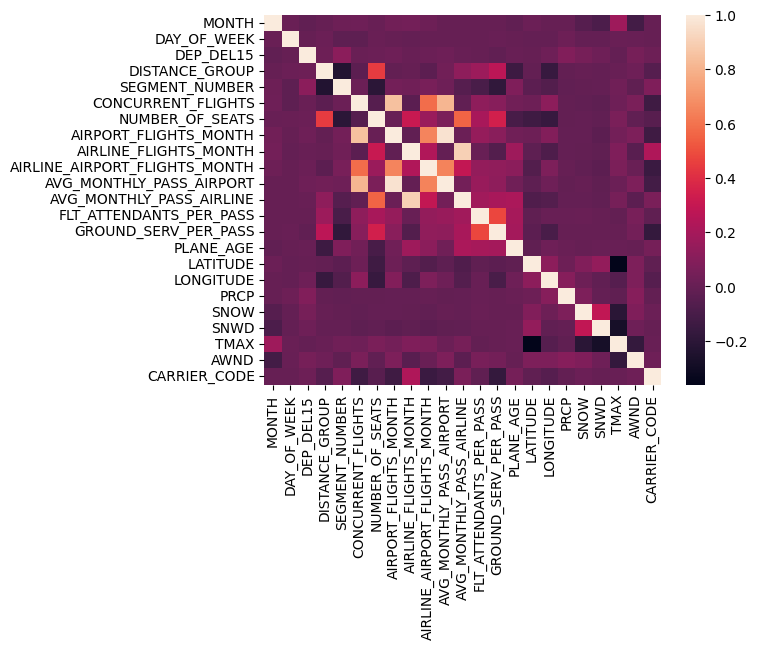

In [ ]:
## Running a heatmap correlation

sns.heatmap(df.corr())

In [ ]:
## Airline flight counts

totals = df['CARRIER_NAME'].value_counts()

totals

Southwest Airlines Co.          297059
Delta Air Lines Inc.            216130
American Airlines Inc.          207605
United Air Lines Inc.           137854
SkyWest Airlines Inc.           133448
Midwest Airline, Inc.            68553
JetBlue Airways                  61986
Alaska Airlines Inc.             54916
American Eagle Airlines Inc.     52586
Comair Inc.                      50511
Endeavor Air Inc.                46536
Spirit Air Lines                 43720
Mesa Airlines Inc.               40653
Frontier Airlines Inc.           27812
Atlantic Southeast Airlines      22784
Hawaiian Airlines Inc.           16980
Allegiant Air                     9929
Name: CARRIER_NAME, dtype: int64

In [ ]:
## Finding delays

dels = df.loc[df['DEP_DEL15'] == 1]['CARRIER_NAME'].value_counts()

dels

Southwest Airlines Co.          62025
American Airlines Inc.          41528
Delta Air Lines Inc.            31713
United Air Lines Inc.           26823
SkyWest Airlines Inc.           23712
JetBlue Airways                 15753
Midwest Airline, Inc.           11297
Comair Inc.                      9671
American Eagle Airlines Inc.     9396
Alaska Airlines Inc.             9017
Spirit Air Lines                 8248
Endeavor Air Inc.                7993
Mesa Airlines Inc.               7840
Frontier Airlines Inc.           7161
Atlantic Southeast Airlines      5241
Allegiant Air                    1924
Hawaiian Airlines Inc.           1486
Name: CARRIER_NAME, dtype: int64

In [ ]:
## Percentage of delays by carrier

del_perc = (dels / totals * 100).sort_values(ascending=False)

del_perc

Frontier Airlines Inc.          25.747879
JetBlue Airways                 25.413803
Atlantic Southeast Airlines     23.002985
Southwest Airlines Co.          20.879691
American Airlines Inc.          20.003372
United Air Lines Inc.           19.457542
Allegiant Air                   19.377581
Mesa Airlines Inc.              19.285170
Comair Inc.                     19.146325
Spirit Air Lines                18.865508
American Eagle Airlines Inc.    17.867874
SkyWest Airlines Inc.           17.768719
Endeavor Air Inc.               17.175950
Midwest Airline, Inc.           16.479220
Alaska Airlines Inc.            16.419623
Delta Air Lines Inc.            14.673113
Hawaiian Airlines Inc.           8.751472
Name: CARRIER_NAME, dtype: float64

In [ ]:
## Making an airline dataframe

airlines = pd.DataFrame(del_perc)
airlines = airlines.reset_index()
airlines = airlines.rename(columns={'CARRIER_NAME':'Delay_Percentage', 'index':'Airline'})
airlines = airlines[['Airline', 'Delay_Percentage']]
airlines.head()

,Airline,Delay_Percentage
0,Frontier Airlines Inc.,25.747879
1,JetBlue Airways,25.413803
2,Atlantic Southeast Airlines,23.002985
3,Southwest Airlines Co.,20.879691
4,American Airlines Inc.,20.003372


In [ ]:
## Averaging out relevant columns by airline and appending them to the new dataframe

## Dep_Time_Block

dep_time = df.groupby(['CARRIER_NAME', 'DEP_TIME_BLK'])['DEP_TIME_BLK'].count().unstack()
result_dict = dep_time.to_dict(orient='index')

final_output = {}
for key, value in result_dict.items():
    carrier_name = key
    final_output[carrier_name] = value

airlines['Dep_time_blk'] = 0
for key, value in final_output.items():
    airlines.loc[airlines.Airline == key, 'Dep_time_blk'] = [value]

airlines.head()

,Airline,Delay_Percentage,Dep_time_blk
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07..."
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07..."
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070..."
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0..."
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0..."


In [ ]:
df['DEP_TIME_BLK'].value_counts()

0800-0859    104468
0700-0759     99675
0600-0659     98671
1700-1759     93549
1000-1059     91315
1200-1259     91262
0900-0959     90446
1100-1159     90279
1500-1559     88969
1400-1459     86579
1800-1859     86038
1600-1659     84679
1900-1959     81950
1300-1359     81021
2000-2059     78861
2100-2159     51053
2200-2259     44472
0001-0559     34110
2300-2359     11665
Name: DEP_TIME_BLK, dtype: int64

In [ ]:
## Distance group

dist_means = df.groupby('CARRIER_NAME')['DISTANCE_GROUP'].mean().to_frame().reset_index().rename(columns={'CARRIER_NAME':'Airline'})

airlines = pd.merge(airlines, dist_means, on='Airline').rename(columns={'DISTANCE_GROUP':'Avg_dist_grp'})

airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386


In [ ]:
## SEGMENT_NUMBER

df = df.rename(columns={'CARRIER_NAME':'Airline'})
seg_means = df.groupby('Airline')['SEGMENT_NUMBER'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, seg_means, on='Airline').rename(columns={'SEGMENT_NUMBER':'Avg_seg_num'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382


In [ ]:
## CONCURRENT_FLIGHTS

conc_means = df.groupby('Airline')['CONCURRENT_FLIGHTS'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, conc_means, on='Airline').rename(columns={'CONCURRENT_FLIGHTS':'Avg_conc_flights'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588


In [ ]:
## NUMBER_OF_SEATS

seat_means = df.groupby('Airline')['NUMBER_OF_SEATS'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, seat_means, on='Airline').rename(columns={'NUMBER_OF_SEATS':'Avg_num_seats'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights,Avg_num_seats
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919,191.326046
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589,138.903575
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914,115.214142
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404,150.911415
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588,160.323957


In [ ]:
## AIRLINE_FLIGHTS_MONTH

flight_means = df.groupby('Airline')['AIRLINE_FLIGHTS_MONTH'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, flight_means, on='Airline').rename(columns={'AIRLINE_FLIGHTS_MONTH':'Avg_flights_month'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights,Avg_num_seats,Avg_flights_month
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919,191.326046,11258.365885
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589,138.903575,24518.770271
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914,115.214142,10817.461245
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404,150.911415,111170.795808
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588,160.323957,77332.790395


In [ ]:
## AVG_MONTHLY_PASS_AIRLINE

pass_means = df.groupby('Airline')['AVG_MONTHLY_PASS_AIRLINE'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, pass_means, on='Airline').rename(columns={'AVG_MONTHLY_PASS_AIRLINE':'Avg_pass_month'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights,Avg_num_seats,Avg_flights_month,Avg_pass_month
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919,191.326046,11258.365885,1857122.0
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589,138.903575,24518.770271,3190369.0
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914,115.214142,10817.461245,473794.0
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404,150.911415,111170.795808,13382999.0
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588,160.323957,77332.790395,11744595.0


In [ ]:
## FLT_ATTENDANTS_PER_PASS

flt_attend_means = df.groupby('Airline')['FLT_ATTENDANTS_PER_PASS'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, flt_attend_means, on='Airline').rename(columns={'FLT_ATTENDANTS_PER_PASS':'Avg_flt_attends_per_pass'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights,Avg_num_seats,Avg_flights_month,Avg_pass_month,Avg_flt_attends_per_pass
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919,191.326046,11258.365885,1857122.0,0.000116
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589,138.903575,24518.770271,3190369.0,0.000160
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914,115.214142,10817.461245,473794.0,0.000000
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404,150.911415,111170.795808,13382999.0,0.000062
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588,160.323957,77332.790395,11744595.0,0.000098


In [ ]:
## GROUND_SERV_PER_PASS

grnd_serv_means = df.groupby('Airline')['GROUND_SERV_PER_PASS'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, grnd_serv_means, on='Airline').rename(columns={'GROUND_SERV_PER_PASS':'Avg_grnd_serv_per_pass'})
airlines.head()

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights,Avg_num_seats,Avg_flights_month,Avg_pass_month,Avg_flt_attends_per_pass,Avg_grnd_serv_per_pass
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919,191.326046,11258.365885,1857122.0,0.000116,0.000007
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589,138.903575,24518.770271,3190369.0,0.000160,0.000127
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914,115.214142,10817.461245,473794.0,0.000000,0.000200
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404,150.911415,111170.795808,13382999.0,0.000062,0.000099
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588,160.323957,77332.790395,11744595.0,0.000098,0.000177


In [ ]:
## PLANE_AGE

plane_age_means = df.groupby('Airline')['PLANE_AGE'].mean().to_frame().reset_index()
airlines = pd.merge(airlines, plane_age_means, on='Airline').rename(columns={'PLANE_AGE':'Avg_plane_age'})
airlines

,Airline,Delay_Percentage,Dep_time_blk,Avg_dist_grp,Avg_seg_num,Avg_conc_flights,Avg_num_seats,Avg_flights_month,Avg_pass_month,Avg_flt_attends_per_pass,Avg_grnd_serv_per_pass,Avg_plane_age
0,Frontier Airlines Inc.,25.747879,"{'0001-0559': 1662.0, '0600-0659': 2378.0, '07...",4.703329,2.888142,22.769919,191.326046,11258.365885,1857122.0,0.000116,0.000007,3.938803
1,JetBlue Airways,25.413803,"{'0001-0559': 2557.0, '0600-0659': 4683.0, '07...",4.963556,2.799229,19.178589,138.903575,24518.770271,3190369.0,0.000160,0.000127,10.695593
2,Atlantic Southeast Airlines,23.002985,"{'0001-0559': 163.0, '0600-0659': 1108.0, '070...",2.461201,2.912482,29.777914,115.214142,10817.461245,473794.0,0.000000,0.000200,10.956373
3,Southwest Airlines Co.,20.879691,"{'0001-0559': 8440.0, '0600-0659': 23722.0, '0...",3.458774,3.446861,18.120404,150.911415,111170.795808,13382999.0,0.000062,0.000099,12.120959
4,American Airlines Inc.,20.003372,"{'0001-0559': 7593.0, '0600-0659': 14333.0, '0...",4.433386,2.588382,32.742588,160.323957,77332.790395,11744595.0,0.000098,0.000177,11.233212
5,United Air Lines Inc.,19.457542,"{'0001-0559': 2374.0, '0600-0659': 9818.0, '07...",5.236555,2.389180,31.261371,158.361883,51976.807071,8501631.0,0.000254,0.000229,15.209584
6,Allegiant Air,19.377581,"{'0001-0559': nan, '0600-0659': 677.0, '0700-0...",3.886091,2.900393,13.609226,128.924464,9217.724343,1257616.0,0.000013,0.000108,11.000000
7,Mesa Airlines Inc.,19.285170,"{'0001-0559': 755.0, '0600-0659': 1802.0, '070...",2.822867,3.200157,33.049590,75.332079,18479.556835,1191889.0,0.000000,0.000091,9.672792
8,Comair Inc.,19.146325,"{'0001-0559': 1454.0, '0600-0659': 1446.0, '07...",2.123240,3.890143,29.593692,76.273703,23625.895508,1245396.0,0.000000,0.000090,9.603552
9,Spirit Air Lines,18.865508,"{'0001-0559': 859.0, '0600-0659': 3523.0, '070...",4.458920,2.933600,24.847964,183.009332,16899.935682,2688839.0,0.000009,0.000125,5.446134


NameError: ignored

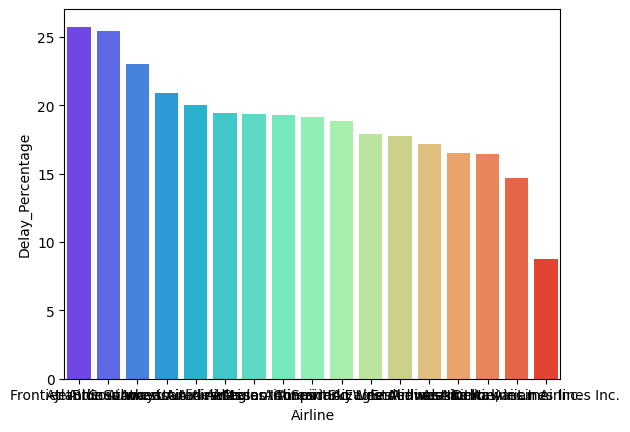

In [ ]:
## Plotting the Delay Percentage

a = sns.barplot(data=airlines, x='Airline', y='Delay_Percentage', palette='rainbow')
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Delay Percentage', title='Percentage of Flight Delays')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Delay Percentage')]

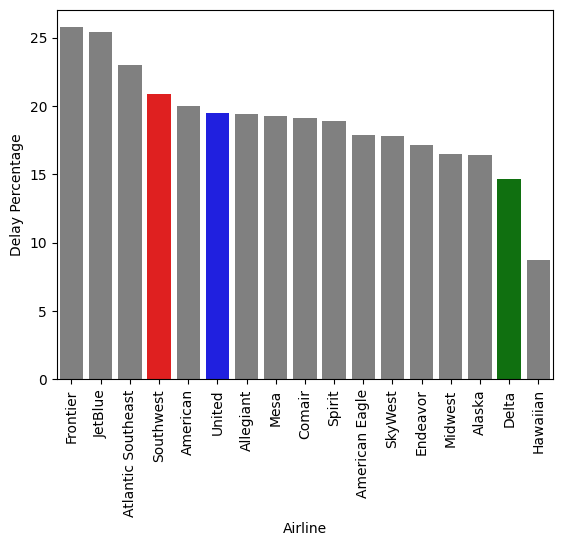

In [ ]:
## Plotting Delay Percentage with United highlighted

airline_names_short = ['Frontier', 'JetBlue', 'Atlantic Southeast', 'Southwest', 'American',
                       'United', 'Allegiant', 'Mesa', 'Comair', 'Spirit', 'American Eagle', 'SkyWest',
                       'Endeavor', 'Midwest', 'Alaska', 'Delta', 'Hawaiian']
clrs = ['grey' if ((x != 'United Air Lines Inc.') and (x != 'Delta Air Lines Inc.') and (x != 'Southwest Airlines Co.'))
        else 'red' if (x == 'Southwest Airlines Co.') else
        'green' if (x == 'Delta Air Lines Inc.') else 'blue' for x in airlines['Airline']]
a = sns.barplot(data=airlines, x='Airline', y='Delay_Percentage', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Delay Percentage')

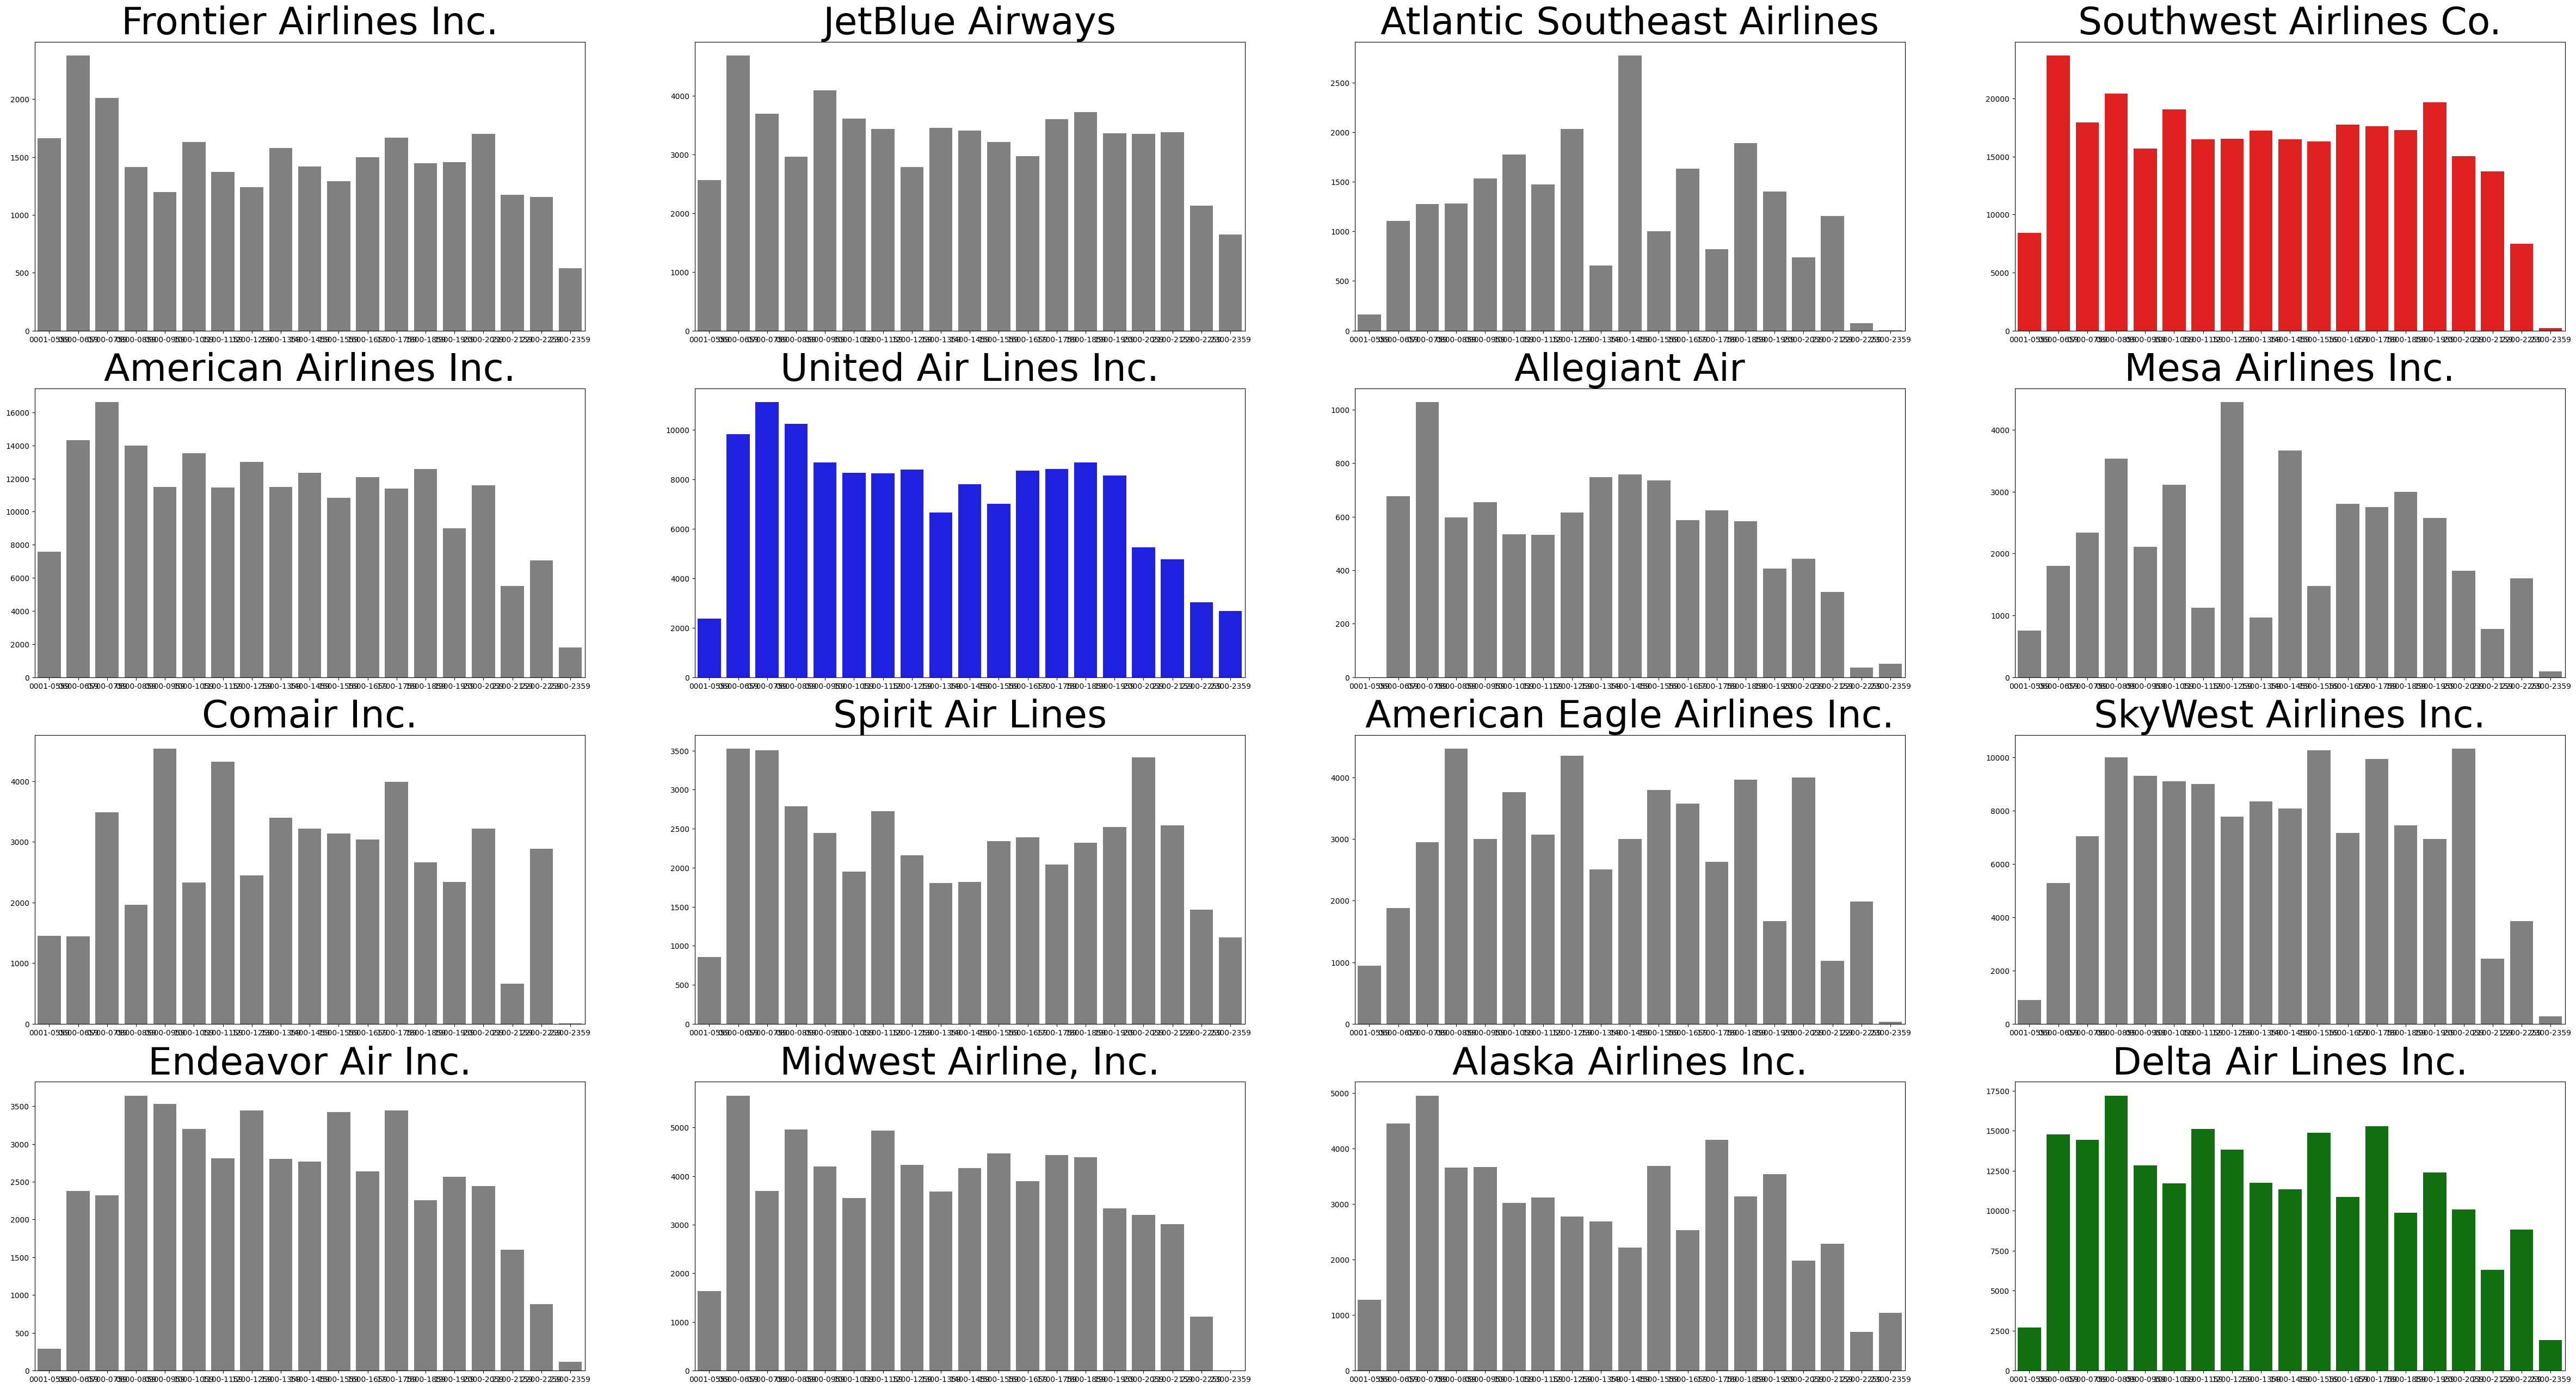

In [ ]:
## Making some visualizations by variable - highlighting United

## Dep_time_blk

def create_barplot_grid(dataframe):
    plt.figure(figsize=(60, 40))
    lines = dataframe.loc[dataframe['Airline'] != 'Hawaiian Airlines Inc.']['Airline']

    for i, airline in enumerate(lines, 1):
        plt.subplot(5, 4, i)
        subset = dataframe[dataframe['Airline'] == airline]
        keys = list()
        vals = list()
        clr = 'grey'
        if airline == 'United Air Lines Inc.':
            clr = 'blue'
        if airline == 'Southwest Airlines Co.':
            clr = 'red'
        if airline == 'Delta Air Lines Inc.':
            clr = 'green'

        for key, value in subset['Dep_time_blk'].iloc[0].items():
            keys.append(key)
            vals.append(value)

        sns.barplot(x=keys, y=vals, color= clr)

        plt.title(f'{airline}', size=50)

create_barplot_grid(airlines)

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Distance Group')]

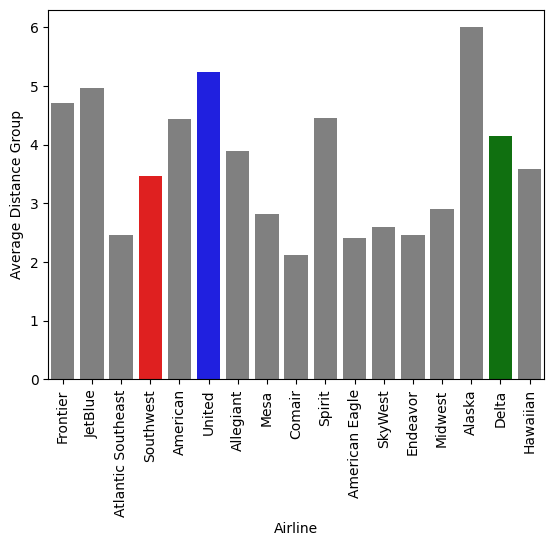

In [ ]:
## Plotting Avg_dist_grp - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_dist_grp', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Distance Group')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Segment Number')]

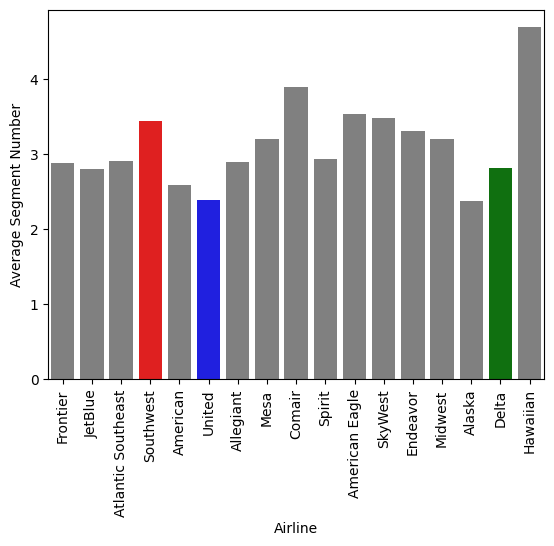

In [ ]:
## Avg_seg_num - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_seg_num', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Segment Number')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Concurrent Flights')]

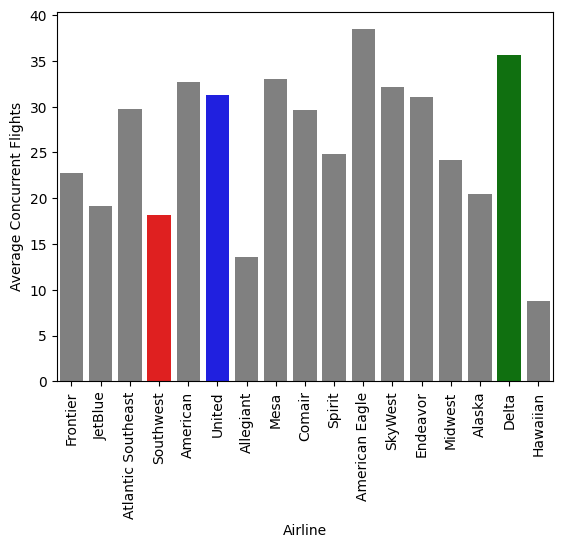

In [ ]:
## Avg_conc_flights - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_conc_flights', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Concurrent Flights')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Number of Seats per Flight')]

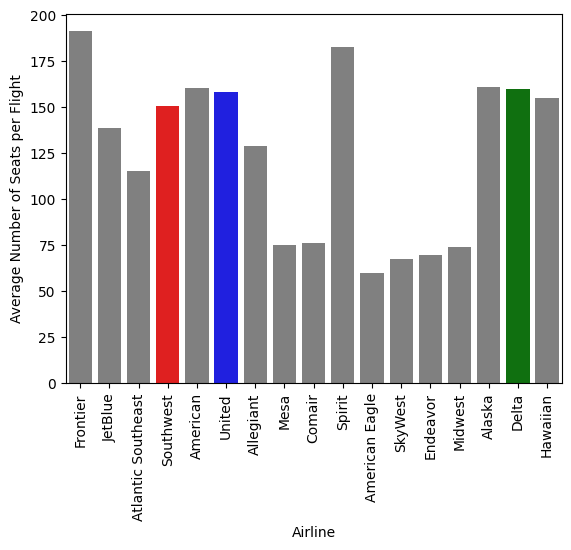

In [ ]:
## Avg_num_seats - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_num_seats', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Number of Seats per Flight')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Flights per Month')]

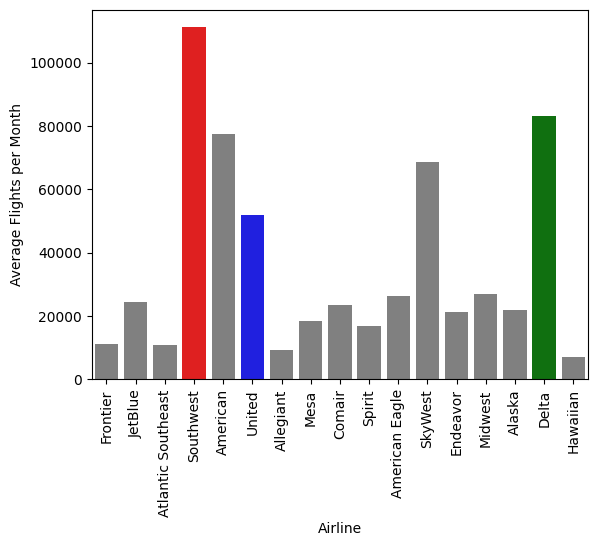

In [ ]:
## Avg_flights_month - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_flights_month', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Flights per Month')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Passengers per Month')]

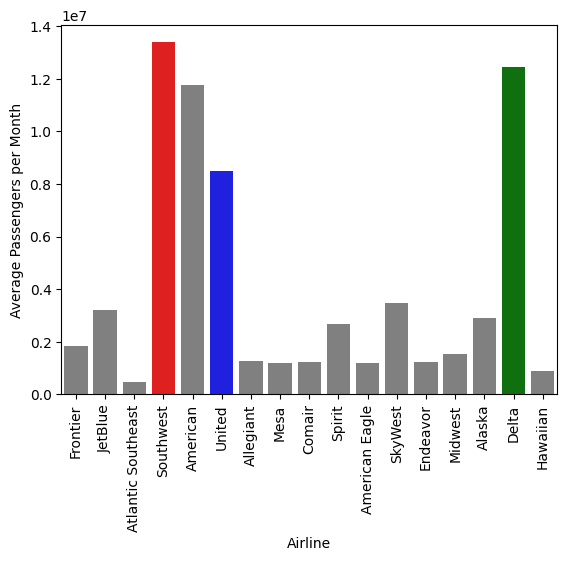

In [ ]:
## Avg_pass_month - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_pass_month', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Passengers per Month')

[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Average Flight Attendents per Passenger')]

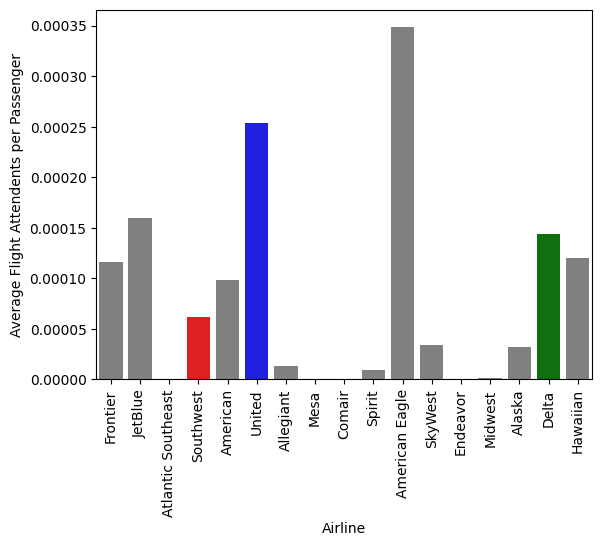

In [ ]:
## Avg_flt_attends_per_pass - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_flt_attends_per_pass', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Flight Attendents per Passenger')

[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Average Ground Servicemembers per Passenger')]

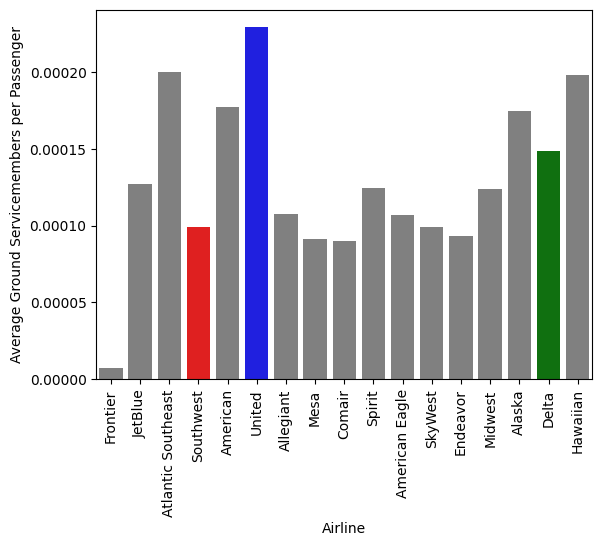

In [ ]:
## Avg_grnd_serv_per_pass - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_grnd_serv_per_pass', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Ground Servicemembers per Passenger')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Plane Age')]

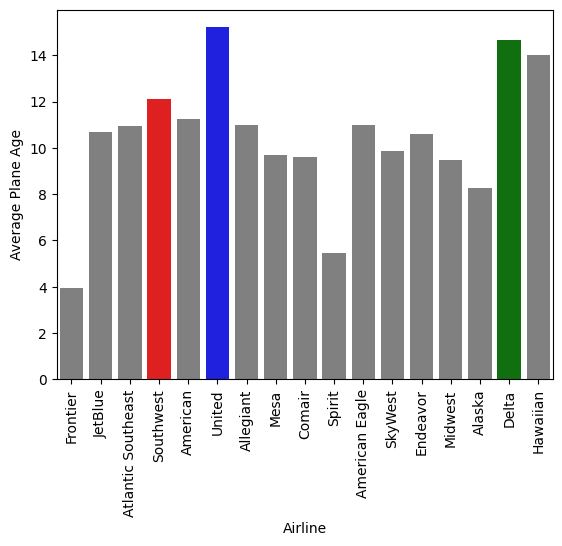

In [ ]:
## Avg_plane_age - highlighting United

a = sns.barplot(data=airlines, x='Airline', y='Avg_plane_age', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Plane Age')

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Average Passengers per Month')]

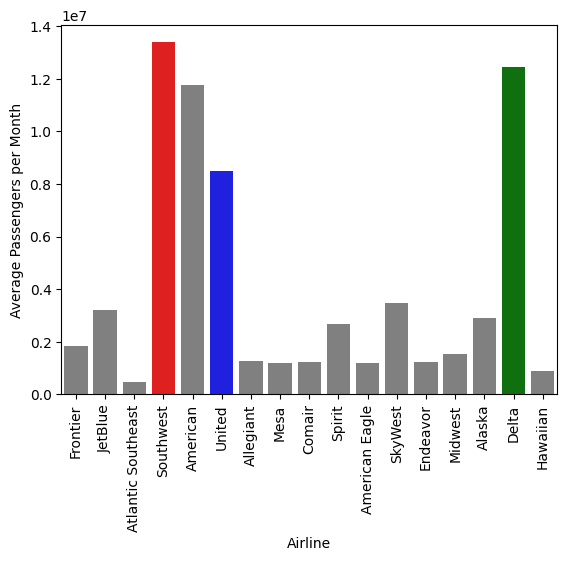

In [ ]:
## Avg pass per month, direct comp - highlighting United

clrs = ['grey' if ((x != 'United Air Lines Inc.') and (x != 'Delta Air Lines Inc.') and (x != 'Southwest Airlines Co.'))
        else 'red' if (x == 'Southwest Airlines Co.') else
        'green' if (x == 'Delta Air Lines Inc.') else 'blue' for x in airlines['Airline']]

a = sns.barplot(data=airlines, x='Airline', y='Avg_pass_month', palette=clrs)
a.set_xticklabels(airline_names_short, rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Passengers per Month')

[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Average Concurrent Flights'),
 Text(0.5, 1.0, 'Airlines with over 2 Million Passengers a Month')]

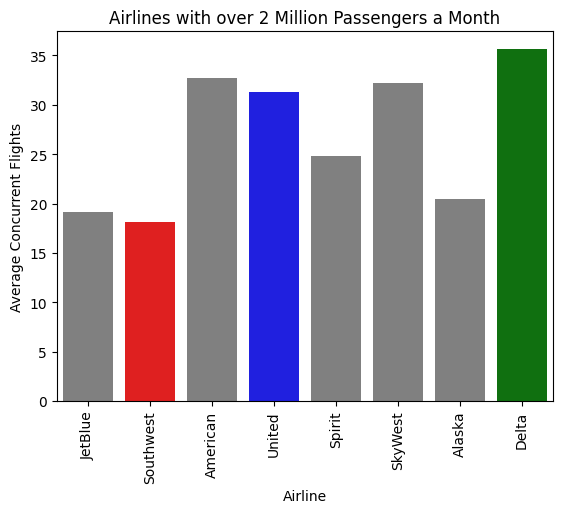

In [ ]:
## Peer Airlines - Concurrent Flights

over_one = airlines.loc[airlines['Avg_pass_month'] >= 2000000]

clrs2 = ['grey' if ((x != 'United Air Lines Inc.') and (x != 'Delta Air Lines Inc.') and (x != 'Southwest Airlines Co.'))
        else 'red' if (x == 'Southwest Airlines Co.') else
        'green' if (x == 'Delta Air Lines Inc.') else 'blue' for x in over_one['Airline']]

a = sns.barplot(data=over_one, x='Airline', y='Avg_conc_flights', palette=clrs2)
a.set_xticklabels(['JetBlue', 'Southwest', 'American', 'United', 'Spirit', 'SkyWest', 'Alaska',
                  'Delta'],rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Concurrent Flights', title='Airlines with over 2 Million Passengers a Month')

[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Average Flights per Month'),
 Text(0.5, 1.0, 'Airlines with over 2 Million Passengers a Month')]

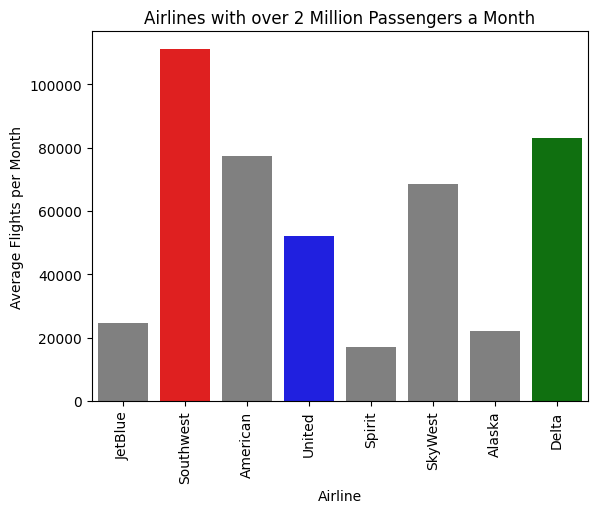

In [ ]:
## Peer Airlines - Flights per Month

a = sns.barplot(data=over_one, x='Airline', y='Avg_flights_month', palette=clrs2)
a.set_xticklabels(['JetBlue', 'Southwest', 'American', 'United', 'Spirit', 'SkyWest', 'Alaska',
                  'Delta'],rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Flights per Month', title='Airlines with over 2 Million Passengers a Month')

[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Average Flight Attendants per Passenger'),
 Text(0.5, 1.0, 'Airlines with over 2 Million Passengers a Month')]

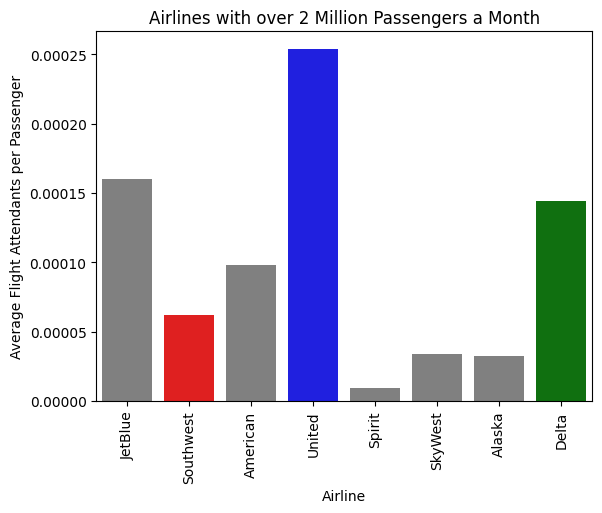

In [ ]:
## Peer Airlines - Flight Attendants per Passenger

a = sns.barplot(data=over_one, x='Airline', y='Avg_flt_attends_per_pass', palette=clrs2)
a.set_xticklabels(['JetBlue', 'Southwest', 'American', 'United', 'Spirit', 'SkyWest', 'Alaska',
                  'Delta'],rotation=90)
a.set(xlabel = 'Airline', ylabel='Average Flight Attendants per Passenger', title='Airlines with over 2 Million Passengers a Month')

### Analysis 3
*By Corbin Diaz*

In [ ]:
# create box plot of distribution of seats across all flights
a = sns.boxplot(x = 'NUMBER_OF_SEATS', data = df_subset)
a.set(xlabel = 'Number Of Seats', title = 'Distribution Of The Number Of Seats Across All Flights');

In [ ]:
# find proportion of flights that are delayed for every seat number and plot
plane_seats_delays = df_subset[['NUMBER_OF_SEATS','DEP_DEL15']].groupby(['NUMBER_OF_SEATS']).mean().sort_values('DEP_DEL15', ascending = False)
plane_seats_delays.reset_index(inplace = True)

a = sns.regplot(x = 'NUMBER_OF_SEATS', y = 'DEP_DEL15', data = plane_seats_delays)
a.set(xlabel = 'Number Of Seats', ylabel = 'Proportion of Flights Delayed',
     title = 'Proportion Of Flights Delayed By Plane Size');

In [ ]:
# bin the number of seats into three equal sized bins
# note the number of seats are "equally binned" by the number of flights and not by the number of unique seat sizes
# this is to account for the popularity of each plane size and not simply by the number of plane sizes
seats_binned = pd.qcut(df_subset['NUMBER_OF_SEATS'],3,retbins = True)
seat_bin_list = seats_binned[0].unique().sort_values()

# however, in order to calculate delay proportions, the data must be grouped by seat size
# this then maps each seat size to its corresponding bin
bin_names = ['Small', 'Medium', 'Large']
def bin_sorter(seat):
    for i, bin in enumerate(seat_bin_list):
        if seat in bin:
            return bin_names[i]
            break
plane_seats_delays['SEAT_BINS'] = plane_seats_delays['NUMBER_OF_SEATS'].map(lambda x:bin_sorter(x))

# plot of plane size vs delay proportion
a = sns.violinplot(x = 'SEAT_BINS', y = 'DEP_DEL15', data = plane_seats_delays, order = bin_names)
a.set(xlabel = 'Plane Size', ylabel = 'Proportion of Flights Delayed',
     title = 'Proportion Of Flights Delayed By Plane Size');

In [ ]:
# create a column of all ones for easy counting
df_subset['COUNT'] = 1
# find delay proportions by carrier
carrier_props = df_subset[['CARRIER_NAME', 'DEP_DEL15']].groupby('CARRIER_NAME').mean()

# find delay proportions by each carrier and number of seats
airline_seats = df_subset[['NUMBER_OF_SEATS', 'DEP_DEL15', 'CARRIER_NAME']].groupby(['NUMBER_OF_SEATS', 'CARRIER_NAME']).mean()
airline_seats = airline_seats.reset_index()
airline_seats['SEAT_BINS'] = airline_seats['NUMBER_OF_SEATS'].map(lambda x: bin_sorter(x))

# find the number of times each carrier-seat-number combo is flown
airline_seat_counts = df_subset[['NUMBER_OF_SEATS', 'COUNT', 'CARRIER_NAME']].groupby(['NUMBER_OF_SEATS', 'CARRIER_NAME']).sum()
airline_seat_counts = airline_seat_counts.reset_index()
airline_seat_counts['SEAT_BINS'] = airline_seat_counts['NUMBER_OF_SEATS'].map(lambda x: bin_sorter(x))

# find total flight counts for each carrier
airline_seat_totals = airline_seat_counts[['NUMBER_OF_SEATS', 'COUNT', 'CARRIER_NAME']].groupby(['CARRIER_NAME']).sum()

airline_seat_counts = airline_seat_counts.set_index(['NUMBER_OF_SEATS', 'CARRIER_NAME'])

# find proportion each plane size is used for each carrier
airline_seat_props = airline_seat_counts.copy()
airline_seat_props['COUNT'] = airline_seat_counts['COUNT'] / airline_seat_totals['COUNT']
airline_seat_props = airline_seat_props.reset_index()

# merge proportion-used and delay-proportion of each plane size for each carrier
airline_seats = airline_seats.merge(airline_seat_props)

In [ ]:
# create distribution of delay proportions for each plane size for the airlines with the most plane sizes
top_seats = airline_seats['CARRIER_NAME'].value_counts()[0:6]

a = sns.FacetGrid(airline_seats[airline_seats['CARRIER_NAME'].isin(top_seats.index)],
                     col = 'CARRIER_NAME', col_wrap = 3, sharex = False)
a.map_dataframe(sns.stripplot, 'SEAT_BINS', 'DEP_DEL15', hue = 'SEAT_BINS', palette = ['blue', 'orange', 'green'])
a.set_axis_labels('Plane Size', 'Proportion Of Flights Delayed')
a.set_titles(col_template="{col_name}");

In [ ]:
# find proportion of total flights flown for each carrier-seat-bin combo
# by summing the proportions of for number-of-seats within each bin
airline_seats_by_bin = airline_seats[['CARRIER_NAME', 'SEAT_BINS', 'COUNT']].groupby(['CARRIER_NAME', 'SEAT_BINS']).sum()
airline_seats_by_bin = airline_seats_by_bin.reset_index()

# separate the data into each bin
airline_seats_small = airline_seats_by_bin[airline_seats_by_bin['SEAT_BINS'] == 'Small'].set_index('CARRIER_NAME')
airline_seats_medium = airline_seats_by_bin[airline_seats_by_bin['SEAT_BINS'] == 'Medium'].set_index('CARRIER_NAME')
airline_seats_large = airline_seats_by_bin[airline_seats_by_bin['SEAT_BINS'] == 'Large'].set_index('CARRIER_NAME')

# use the proportion that each seat bin is used for each carrier and then combine all data
airline_seats_small['DEP_DEL15'] = carrier_props['DEP_DEL15']
airline_seats_medium['DEP_DEL15'] = carrier_props['DEP_DEL15']
airline_seats_large['DEP_DEL15'] = carrier_props['DEP_DEL15']

airline_seats_small.reset_index(inplace = True)
airline_seats_medium.reset_index(inplace = True)
airline_seats_large.reset_index(inplace = True)

airline_seats_by_bin = pd.concat([airline_seats_small, airline_seats_medium, airline_seats_large])

# plot delay proportion by the proportion of flights flown in each plane size for each carrier
a = sns.FacetGrid(airline_seats_by_bin, hue = 'SEAT_BINS', col = 'SEAT_BINS')
a.map_dataframe(sns.regplot, 'COUNT', 'DEP_DEL15')
a.set_axis_labels('Proportion in Plane Size', 'Proportion Of Flights Delayed')
a.set_titles(col_template="{col_name}");

In [ ]:
# output how many plane sizes each carrier has
airline_seats['CARRIER_NAME'].value_counts()

In [ ]:
# find the number of plane sizes each carrier holds, along with the corresponding proportion of flights delayed
airline_seats_options = airline_seats.copy()
airline_seats_options['COUNT'] = 1
airline_seats_options = airline_seats_options[['CARRIER_NAME', 'COUNT']].groupby('CARRIER_NAME').sum()
airline_seats_options = airline_seats_options.reset_index().set_index('CARRIER_NAME')
airline_seats_options['DEP_DEL15'] = carrier_props['DEP_DEL15']

# plot data
a = sns.regplot(x = 'COUNT', y = 'DEP_DEL15', data = airline_seats_options)
a.set(xlabel = 'Number Of Plane Sizes', ylabel = 'Proportion Of Flights Delayed',
     title = 'Proportion Of Flights Delayed By Number Of Plane Sizes');

In [ ]:
# find correlation
airline_seats_options.corr()**2

In [ ]:
# remove outlier values of number of different plane sizes
q1 = np.percentile(airline_seats_options['COUNT'],25)
q3 = np.percentile(airline_seats_options['COUNT'],75)
intQ_range = q3-q1

Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

airline_seats_options_no_outliers = airline_seats_options[(airline_seats_options['COUNT']>=Lower_fence) &
                                             (airline_seats_options['COUNT']<=Upper_fence)]

# plot data without outliers
a = sns.scatterplot(x = 'COUNT', y = 'DEP_DEL15', data = airline_seats_options_no_outliers)
a.set(xlabel = 'Number Of Plane Sizes', ylabel = 'Proportion Of Flights Delayed',
     title = 'Proportion Of Flights Delayed By Number Of Plane Sizes')

In [ ]:
# grab data from United, Southwest, and Delta
united_and_benchmarks_list = ['United Air Lines Inc.', 'Southwest Airlines Co.', 'Delta Air Lines Inc.']
united_and_benchmarks_seats = airline_seats[airline_seats['CARRIER_NAME'].isin(united_and_benchmarks_list)]

In [ ]:
# plot delay proportions for each plane size for each carrier
a = sns.barplot(x = 'SEAT_BINS', y = 'DEP_DEL15', hue = 'CARRIER_NAME', data = united_and_benchmarks_seats,
           hue_order = united_and_benchmarks_list, palette = ['#0033A0', '#E51D23', '#009a5c'])
a.set(xlabel = 'Plane Size', ylabel = 'Average Proportion Of Flights Delayed',
     title = 'Average Proportion Of Flights Delayed By Plane Size')
sns.move_legend(a, "center right", bbox_to_anchor = (1.5, 0.5))

In [ ]:
# plot proportions of flights flown for each plane size for each carrier
a = sns.barplot(x = 'SEAT_BINS', y = 'COUNT', hue = 'CARRIER_NAME', data = united_and_benchmarks_seats,
           hue_order = united_and_benchmarks_list, palette = ['#0033A0', '#E51D23', '#009a5c'], estimator = sum, ci = None)
a.set(xlabel = 'Plane Size', ylabel = 'Proportion Of Total Flights',
     title = 'Proportion Of Total Flights For Each Plane Size')
sns.move_legend(a, "center right", bbox_to_anchor = (1.5, 0.5))

### Analysis 4 - weather analysis
*By Nour Taqatqa*

In [ ]:
#subsetting the dataset further into delays and non-delays
delays=df_subset.loc[df_subset["DEP_DEL15"]==1,:]
on_time=df_subset.loc[df_subset["DEP_DEL15"]==0,:]

In [ ]:
#finding porpotion of delays for each airline as a percentage of an airline's total number of flights
#1) putting airports and months into lists
airlines= [airline for airline in df_subset.CARRIER_NAME.unique()]
months = list(range(1,13))
airlines

['Delta Air Lines Inc.',
 'Spirit Air Lines',
 'Alaska Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'United Air Lines Inc.',
 'JetBlue Airways',
 'Allegiant Air',
 'Southwest Airlines Co.',
 'American Airlines Inc.',
 'Frontier Airlines Inc.',
 'SkyWest Airlines Inc.',
 'American Eagle Airlines Inc.',
 'Midwest Airline, Inc.',
 'Endeavor Air Inc.',
 'Atlantic Southeast Airlines',
 'Comair Inc.',
 'Mesa Airlines Inc.']

In [ ]:
dictionary_delays_proportions = {}
proportion_flights=[]
for i in range(len(airlines)):
    flights_per_airline=df_subset.loc[df_subset["CARRIER_NAME"]==airlines[i],:]
    num_flights_airline_a_year=flights_per_airline.shape[0] #this is an integer=len of dataset
    num_flights_porportion = num_flights_airline_a_year/len(df_subset)
    proportion_flights.append(num_flights_porportion)
    delayed_per_airport= flights_per_airline.loc[flights_per_airline["DEP_DEL15"]==1,:]
    on_time_per_airport=flights_per_airline.loc[flights_per_airline["DEP_DEL15"]==0,:]
    proportion_delays_to_total_flights=delayed_per_airport.shape[0]/num_flights_airline_a_year
    dictionary_delays_proportions[airlines[i]]=round(proportion_delays_to_total_flights,2)

Text(0.5, 1.0, 'Proportion of delays for each airline')

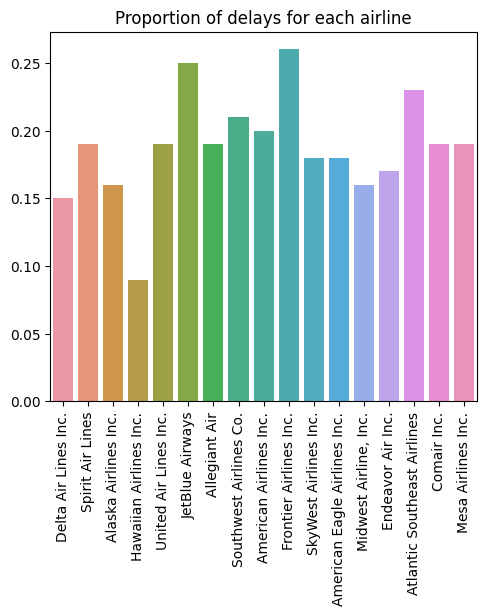

In [ ]:
#showing the airport with the highest proportion of delayed flights with bar plots
ax =sns.barplot(x = airlines, y = list(dictionary_delays_proportions.values()))
ax.figure.set_figwidth(5.5)
plt.xticks(rotation=90) #this makes the text be not horizontal - makes it not overlap
plt.title("Proportion of delays for each airline")

In [ ]:
#weather analysis
#finding mean of snow on ground, perceptiation, and wind for each airline (for full year)
dictionary_weather_info = {} #keys: airport names, values = (snow,rain,wind) in a tuple
weather_indicator_list=[] #the order of airports is that in the airports list
for i in range(len(airlines)):
    flights_per_airline=df_subset.loc[df_subset["CARRIER_NAME"]==airlines[i],:]
    mean_snow_on_ground=flights_per_airline.SNWD.mean(axis=0) #in inches, mean for entire year
    mean_rain_per_day=flights_per_airline.PRCP.mean(axis=0) #in inches, mean for entire year
    mean_wind_for_day=flights_per_airline.AWND.mean(axis=0)
    weather_indicator=(mean_snow_on_ground+mean_rain_per_day+mean_wind_for_day)/3
    weather_indicator_list.append(weather_indicator)
    dictionary_weather_info[airlines[i]]= (mean_snow_on_ground,mean_rain_per_day,mean_wind_for_day)

Text(0.5, 1.0, 'Weather Indicator for average yearly data')

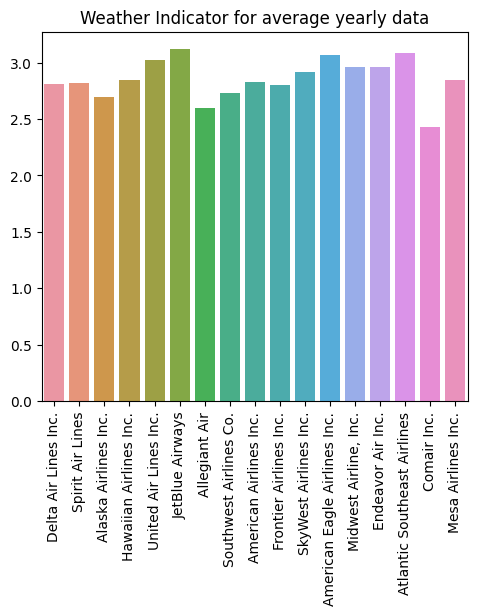

In [ ]:
ax =sns.barplot(x = airlines, y = weather_indicator_list)
ax.figure.set_figwidth(5.5)
plt.xticks(rotation=90)
plt.title("Weather Indicator for average yearly data")

In [ ]:
snow_per_month=[] #list of lists - We have 12 inner lists, each for each month: each inner list has 17 values, 1 value for each airline
rain_per_month=[]
wind_per_month=[]
delays_per_month=[]
for i in range(len(months)):
    flights_per_airline=df_subset.loc[df_subset["MONTH"]==months[i],:]
    snow_per_month_per_airline=flights_per_airline.groupby("CARRIER_NAME").SNWD.mean()
    snow_per_month_list=[i for i in snow_per_month_per_airline]
    snow_per_month.append(snow_per_month_list)
    rain_per_month_per_airline= flights_per_airline.groupby("CARRIER_NAME").PRCP.mean()
    rain_per_month_list=[i for i in rain_per_month_per_airline]
    rain_per_month.append(rain_per_month_list)
    wind_per_month_per_airline= flights_per_airline.groupby("CARRIER_NAME").AWND.mean()
    wind_per_month_list=[i for i in wind_per_month_per_airline]
    wind_per_month.append(wind_per_month_list)
    delays_per_month_per_airline= flights_per_airline.groupby("CARRIER_NAME").DEP_DEL15.mean()
    delays_per_month_list=[i for i in delays_per_month_per_airline]
    delays_per_month.append(delays_per_month_list)

# delays_per_month

In [ ]:
#creating a dataframe for delays per month
snow_per_month_single_list=[snow_per_month[j][i] for j in range(len(snow_per_month)) for i in range(len(snow_per_month[0]))]

rain_per_month_single_list=[rain_per_month[j][i] for j in range(len(snow_per_month)) for i in range(len(snow_per_month[0]))]

wind_per_month_single_list=[wind_per_month[j][i] for j in range(len(snow_per_month)) for i in range(len(snow_per_month[0]))]

indicator_per_month=[(snow_per_month_single_list[j]+rain_per_month_single_list[j]+wind_per_month_single_list[j])/3 for j in range(len(snow_per_month_single_list))]

#creating a list of lists for indicator per month

indicator_per_month_list_of_lists=[]

indicator_per_month_list_of_lists.append(indicator_per_month[:17])
indicator_per_month_list_of_lists.append(indicator_per_month[17:34])
indicator_per_month_list_of_lists.append(indicator_per_month[34:51])
indicator_per_month_list_of_lists.append(indicator_per_month[51:68])
indicator_per_month_list_of_lists.append(indicator_per_month[68:85])
indicator_per_month_list_of_lists.append(indicator_per_month[85:102])
indicator_per_month_list_of_lists.append(indicator_per_month[102:119])
indicator_per_month_list_of_lists.append(indicator_per_month[119:136])
indicator_per_month_list_of_lists.append(indicator_per_month[136:153])
indicator_per_month_list_of_lists.append(indicator_per_month[153:170])
indicator_per_month_list_of_lists.append(indicator_per_month[170:187])
indicator_per_month_list_of_lists.append(indicator_per_month[187:204])

# indicator_per_month_list_of_lists

In [ ]:
indicator_per_month_dataframe = pd.DataFrame(indicator_per_month_list_of_lists, columns=airlines, index=list(range(1,13)))
indicator_per_month_dataframe

,Delta Air Lines Inc.,Spirit Air Lines,Alaska Airlines Inc.,Hawaiian Airlines Inc.,United Air Lines Inc.,JetBlue Airways,Allegiant Air,Southwest Airlines Co.,American Airlines Inc.,Frontier Airlines Inc.,SkyWest Airlines Inc.,American Eagle Airlines Inc.,"Midwest Airline, Inc.",Endeavor Air Inc.,Atlantic Southeast Airlines,Comair Inc.,Mesa Airlines Inc.
1,2.774339,2.543487,2.970664,3.522202,3.320112,2.829754,3.069674,3.581324,2.950465,2.603612,3.432991,2.844123,3.433703,2.960598,2.778272,3.096522,3.086706
2,3.332829,3.143286,3.074265,3.485528,3.241805,2.691727,3.220155,3.386579,3.038015,3.032042,3.396807,2.931007,3.221475,3.436368,3.084401,3.101646,3.285314
3,3.068505,2.890145,3.118602,3.427781,3.362514,2.878891,3.130677,3.372671,3.020558,3.104838,3.455082,3.189913,3.298147,3.117389,2.978971,3.096042,3.215653
4,2.929290,3.016000,3.242520,3.544501,3.422866,2.860747,3.119449,3.221781,3.150604,3.181450,3.430318,3.246142,3.306103,3.291882,3.109151,3.200875,3.338377
5,2.777538,2.837275,3.010081,3.203485,2.976858,2.461034,2.821523,2.871164,2.882707,3.019829,3.118058,2.996183,2.954420,3.076123,2.915925,2.927230,3.088225
6,2.704728,2.631015,2.760610,2.882727,2.995005,2.407435,2.691997,2.723884,2.776124,2.950215,2.870484,2.865728,2.780674,2.892671,2.700887,2.690076,2.973671
7,2.589756,2.274084,2.621213,2.741794,3.089247,1.962423,2.467932,2.381697,2.582978,3.150553,2.608284,2.844736,2.509179,2.806179,2.582977,2.563857,2.948658
8,2.472818,2.146570,2.436443,2.490614,2.689256,1.890574,2.341399,2.323608,2.459288,2.824043,2.599280,2.559123,2.380350,2.561507,2.392124,2.383556,2.757137
9,2.593781,2.469428,2.671174,2.748231,2.827337,1.977257,2.558169,2.472069,2.779578,2.742117,3.012017,2.643466,2.598628,2.778380,2.583728,2.755697,2.955093
10,2.538518,2.661981,2.846455,3.121182,2.982471,2.426305,2.785474,2.963561,2.810334,2.381018,3.175447,2.857193,3.001260,2.825086,2.668196,2.842227,2.958492


In [ ]:
#delays per month dataframe
delays_dataframe = pd.DataFrame(delays_per_month, columns=airlines, index=list(range(1,13)))
delays_dataframe

,Delta Air Lines Inc.,Spirit Air Lines,Alaska Airlines Inc.,Hawaiian Airlines Inc.,United Air Lines Inc.,JetBlue Airways,Allegiant Air,Southwest Airlines Co.,American Airlines Inc.,Frontier Airlines Inc.,SkyWest Airlines Inc.,American Eagle Airlines Inc.,"Midwest Airline, Inc.",Endeavor Air Inc.,Atlantic Southeast Airlines,Comair Inc.,Mesa Airlines Inc.
1,0.138223,0.200368,0.159194,0.202273,0.215385,0.148129,0.134735,0.199267,0.244692,0.090000,0.277046,0.170503,0.196690,0.210474,0.171444,0.150861,0.178028
2,0.232620,0.201786,0.202948,0.249861,0.228493,0.215155,0.173110,0.203106,0.269209,0.137931,0.274299,0.204039,0.157939,0.236009,0.261354,0.186530,0.188725
3,0.155079,0.130776,0.189059,0.142044,0.190975,0.169868,0.123877,0.152154,0.203960,0.092812,0.244869,0.166811,0.137621,0.176709,0.207051,0.137884,0.186025
4,0.126510,0.190667,0.200486,0.139190,0.221794,0.220994,0.140011,0.176993,0.219851,0.069767,0.267029,0.165667,0.173368,0.160578,0.217040,0.197106,0.180076
5,0.143854,0.204030,0.260258,0.198303,0.251012,0.169570,0.139536,0.150415,0.313212,0.070994,0.223929,0.189416,0.165885,0.166380,0.248675,0.227761,0.208292
6,0.168958,0.255339,0.280245,0.251216,0.344086,0.216192,0.198129,0.252935,0.331535,0.080868,0.295085,0.255220,0.215461,0.207487,0.260560,0.259165,0.262825
7,0.153059,0.181562,0.237934,0.205774,0.266459,0.210468,0.187764,0.182866,0.322888,0.093054,0.291611,0.195763,0.159402,0.186539,0.216513,0.245329,0.234288
8,0.200804,0.231803,0.223483,0.188795,0.258774,0.224606,0.169771,0.181145,0.277988,0.079705,0.312264,0.219671,0.202379,0.169955,0.193682,0.256968,0.223287
9,0.150773,0.142300,0.152455,0.140888,0.210750,0.150589,0.102875,0.111200,0.198087,0.069600,0.170378,0.162450,0.117951,0.139296,0.120368,0.125534,0.171271
10,0.131303,0.146377,0.173656,0.147946,0.195630,0.169716,0.121881,0.152918,0.241433,0.134050,0.200905,0.213045,0.154644,0.144900,0.179949,0.153825,0.157379


In [ ]:
#finding the correlation
delays_dataframe.corrwith(indicator_per_month_dataframe).sort_values(ascending = False,key=abs)

Endeavor Air Inc.               0.401403
Atlantic Southeast Airlines     0.396127
Comair Inc.                    -0.324852
American Airlines Inc.         -0.300407
United Air Lines Inc.          -0.165776
Allegiant Air                  -0.139086
Southwest Airlines Co.          0.134725
American Eagle Airlines Inc.   -0.125721
JetBlue Airways                -0.124465
SkyWest Airlines Inc.          -0.124411
Delta Air Lines Inc.            0.121742
Spirit Air Lines               -0.075680
Mesa Airlines Inc.             -0.071582
Frontier Airlines Inc.         -0.070815
Alaska Airlines Inc.            0.046326
Hawaiian Airlines Inc.          0.030387
Midwest Airline, Inc.           0.009300
dtype: float64

In [ ]:
#time series analysis
#dataframe of average snow on ground per month for each airline
snow_dataframe = pd.DataFrame(snow_per_month, columns=airlines, index=list(range(1,13)))
snow_dataframe

,Delta Air Lines Inc.,Spirit Air Lines,Alaska Airlines Inc.,Hawaiian Airlines Inc.,United Air Lines Inc.,JetBlue Airways,Allegiant Air,Southwest Airlines Co.,American Airlines Inc.,Frontier Airlines Inc.,SkyWest Airlines Inc.,American Eagle Airlines Inc.,"Midwest Airline, Inc.",Endeavor Air Inc.,Atlantic Southeast Airlines,Comair Inc.,Mesa Airlines Inc.
1,0.785825,0.257169,0.281517,0.742323,0.604289,0.366348,0.305735,0.461161,0.330688,0.000000,0.184389,0.288522,0.463684,0.516733,0.315150,0.299875,0.448311
2,1.465556,0.456071,0.199845,0.534133,0.310301,0.227267,0.290206,0.335311,0.409759,0.036004,0.143434,0.107103,0.255056,0.533102,0.321570,0.214986,0.355203
3,0.842438,0.249346,0.067521,0.153294,0.146217,0.146100,0.113765,0.193867,0.229059,0.002163,0.143572,0.083753,0.155360,0.164808,0.129433,0.057155,0.157931
4,0.015478,0.018133,0.007328,0.035798,0.023225,0.005573,0.007784,0.009624,0.040000,0.000000,0.001914,0.001136,0.006841,0.026057,0.017856,0.012098,0.028707
5,0.000656,0.000000,0.000865,0.000000,0.000000,0.000000,0.001657,0.000000,0.027480,0.000000,0.001176,0.000000,0.002597,0.004793,0.005274,0.004755,0.010539
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.001513,0.001739,0.010138,0.017089,0.007856,0.002676,0.007803,0.003320,0.099416,0.000000,0.003113,0.000342,0.009223,0.052412,0.033207,0.020094,0.062347


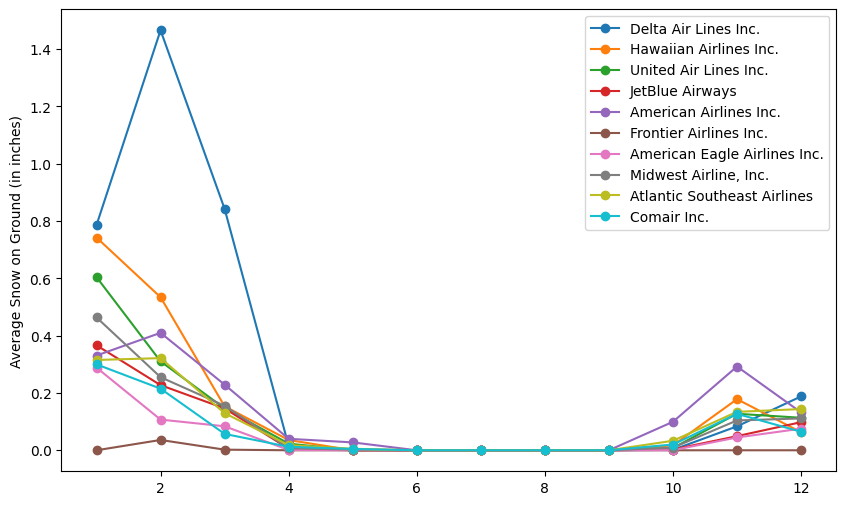

In [ ]:
snow_dataframe_new=snow_dataframe.drop(["Allegiant Air","Endeavor Air Inc.","Mesa Airlines Inc.","Southwest Airlines Co.","Spirit Air Lines","Alaska Airlines Inc.","SkyWest Airlines Inc."],axis=1)
ax = snow_dataframe_new.plot(ylabel = 'Average Snow on Ground (in inches)',figsize = (10,6),marker='o')


In [ ]:
rain_dataframe = pd.DataFrame(rain_per_month, columns=airlines, index=list(range(1,13)))
rain_dataframe

,Delta Air Lines Inc.,Spirit Air Lines,Alaska Airlines Inc.,Hawaiian Airlines Inc.,United Air Lines Inc.,JetBlue Airways,Allegiant Air,Southwest Airlines Co.,American Airlines Inc.,Frontier Airlines Inc.,SkyWest Airlines Inc.,American Eagle Airlines Inc.,"Midwest Airline, Inc.",Endeavor Air Inc.,Atlantic Southeast Airlines,Comair Inc.,Mesa Airlines Inc.
1,0.106573,0.074393,0.094951,0.065563,0.061655,0.127383,0.133017,0.125589,0.087457,0.088336,0.112540,0.051299,0.087771,0.088777,0.093160,0.103180,0.081965
2,0.134219,0.108839,0.103645,0.096389,0.100679,0.164297,0.117860,0.120683,0.091935,0.124757,0.109560,0.080554,0.114261,0.101292,0.106304,0.088794,0.110986
3,0.060907,0.070994,0.075940,0.080179,0.061180,0.103446,0.074745,0.085365,0.059683,0.053594,0.080254,0.059094,0.096720,0.068492,0.066595,0.062738,0.066340
4,0.076202,0.103080,0.122671,0.153681,0.100947,0.148194,0.139178,0.155096,0.079667,0.024986,0.119542,0.095014,0.126301,0.106578,0.093116,0.094104,0.090087
5,0.060389,0.144244,0.129803,0.185429,0.133650,0.116971,0.127649,0.154274,0.122562,0.029561,0.143650,0.098551,0.162056,0.133656,0.136367,0.148047,0.130434
6,0.042746,0.149044,0.139606,0.150524,0.174358,0.180074,0.160195,0.202455,0.147527,0.080283,0.180145,0.106224,0.185252,0.114946,0.115118,0.164055,0.115555
7,0.039068,0.135158,0.100350,0.108817,0.076102,0.129805,0.107131,0.130107,0.100095,0.016343,0.141191,0.058305,0.136988,0.083638,0.080486,0.110005,0.084979
8,0.036116,0.103527,0.129033,0.129395,0.099602,0.185057,0.110711,0.108963,0.093362,0.014910,0.135836,0.083776,0.142025,0.085678,0.092105,0.127883,0.079771
9,0.077517,0.086998,0.052490,0.092869,0.086535,0.027544,0.118557,0.082269,0.039976,0.023432,0.049386,0.045106,0.070331,0.132066,0.066641,0.045121,0.077024
10,0.070342,0.135348,0.134451,0.178409,0.135447,0.179257,0.123940,0.146144,0.089653,0.015513,0.144333,0.105497,0.156243,0.101912,0.105596,0.132156,0.112965


,Delta Air Lines Inc.,Hawaiian Airlines Inc.,United Air Lines Inc.,JetBlue Airways,American Airlines Inc.,Frontier Airlines Inc.,American Eagle Airlines Inc.,"Midwest Airline, Inc.",Atlantic Southeast Airlines,Comair Inc.
1,0.106573,0.065563,0.061655,0.127383,0.087457,0.088336,0.051299,0.087771,0.093160,0.103180
2,0.134219,0.096389,0.100679,0.164297,0.091935,0.124757,0.080554,0.114261,0.106304,0.088794
3,0.060907,0.080179,0.061180,0.103446,0.059683,0.053594,0.059094,0.096720,0.066595,0.062738
4,0.076202,0.153681,0.100947,0.148194,0.079667,0.024986,0.095014,0.126301,0.093116,0.094104
5,0.060389,0.185429,0.133650,0.116971,0.122562,0.029561,0.098551,0.162056,0.136367,0.148047
6,0.042746,0.150524,0.174358,0.180074,0.147527,0.080283,0.106224,0.185252,0.115118,0.164055
7,0.039068,0.108817,0.076102,0.129805,0.100095,0.016343,0.058305,0.136988,0.080486,0.110005
8,0.036116,0.129395,0.099602,0.185057,0.093362,0.014910,0.083776,0.142025,0.092105,0.127883
9,0.077517,0.092869,0.086535,0.027544,0.039976,0.023432,0.045106,0.070331,0.066641,0.045121
10,0.070342,0.178409,0.135447,0.179257,0.089653,0.015513,0.105497,0.156243,0.105596,0.132156


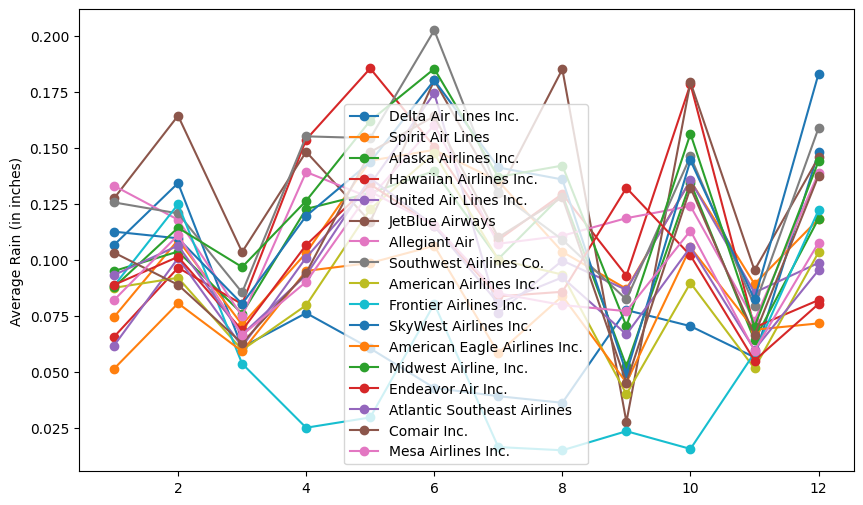

In [ ]:
ax = rain_dataframe.plot(ylabel = 'Average Rain (in inches)',figsize = (10,6),marker='o')

#dropping airlines that are in the middle in terms of size of weather indicator (leaving the highest and th lowest )
rain_dataframe_new = rain_dataframe.drop(["Allegiant Air","Endeavor Air Inc.","Mesa Airlines Inc.","Southwest Airlines Co.","Spirit Air Lines","Alaska Airlines Inc.","SkyWest Airlines Inc."],axis=1)
rain_dataframe_new

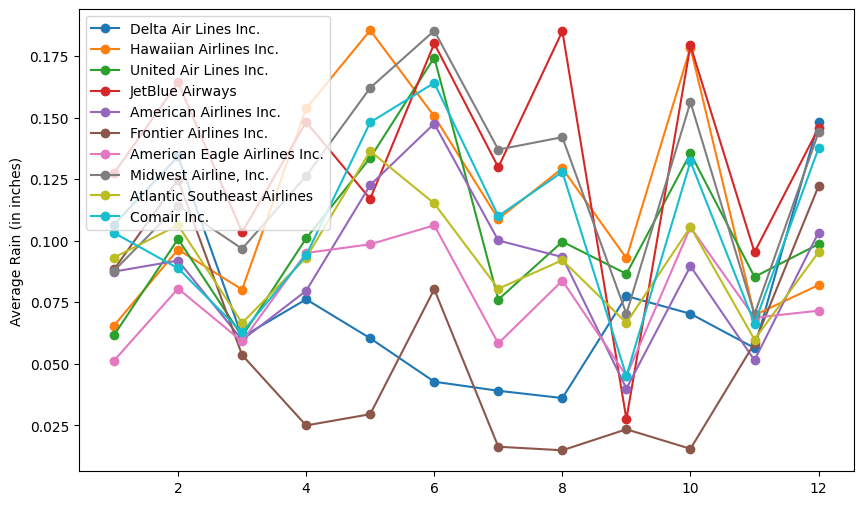

In [ ]:
ax = rain_dataframe_new.plot(ylabel = 'Average Rain (in inches)',figsize = (10,6),marker='o')


In [ ]:
#plotting wind
wind_dataframe = pd.DataFrame(wind_per_month, columns=airlines, index=list(range(1,13)))
wind_dataframe_new = wind_dataframe.drop(["Allegiant Air","Endeavor Air Inc.","Mesa Airlines Inc.","Southwest Airlines Co.","Spirit Air Lines","Alaska Airlines Inc.","SkyWest Airlines Inc."],axis=1)

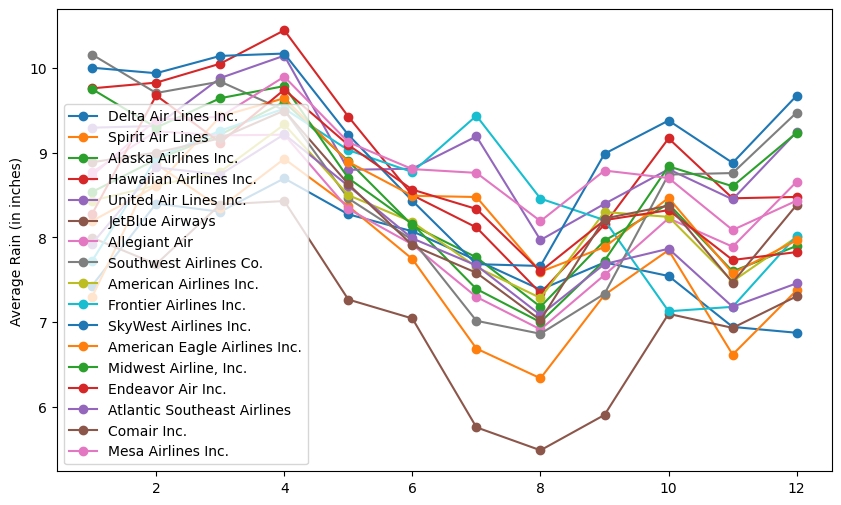

In [ ]:
ax = wind_dataframe.plot(ylabel = 'Average Rain (in inches)',figsize = (10,6),marker='o')


## Other sections

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.